# Financial Programming - IÉSEG, Lille - MBD 2023-2024
## Group Project: Financial Dataset

**Group 7:** SERHAN Yasmina, YUAN Quan, PERAN Mathieu

# **Part 1:** Data Preparation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pprint import pprint
from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from dateutil.relativedelta import relativedelta

# Show all columns
pd.set_option('display.max_columns', None)

In [2]:
# # Yasmina

# directory = r'C:\Users\Source\Desktop\IESEG\FinancialProgramming_0272\FP_GroupProject_Group7\FP_GroupProject_Group7\src'
# input_data = directory + '/data/raw/data_berka'

In [3]:
# # # Quan

# directory = r'C:\Users\Source\Downloads\FP_GroupProject_Group7\FP_GroupProject_Group7\src'
# input_data = directory + '/data/raw/data_berka'

In [4]:
# Mathieu

directory = r'C:\Users\mperan\OneDrive - IESEG\Desktop\FP_GroupProject_Group7'
input_data = directory + '/data/raw/data_berka'

In [5]:
# Import banking data
# Note: This data was extracted on 1999

# Each record describes characteristics of a client
client = pd.read_csv(input_data + '/client.asc', sep=';')

# Each record describes static characteristics of an account
account = pd.read_csv(input_data + '/account.asc', sep=';')

# Each record describes a credit card issued to an account
card = pd.read_csv(input_data + '/card.asc', sep=';')

# Each record describes demographic characteristics of a district
district = pd.read_csv(input_data + '/district.asc', sep=';')

# Each record relates together a client with an account
# i.e. this relation describes the rights of clients to operate accounts
disp = pd.read_csv(input_data + '/disp.asc', sep=';')

# Each record describes characteristics of a payment order (debits only)
order = pd.read_csv(input_data + '/order.asc', sep=';')

# Each record describes one transaction on an account
trans = pd.read_csv(input_data + '/trans.asc', sep=';', low_memory=False)

# Each record describes a loan granted for a given account
loan = pd.read_csv(input_data + '/loan.asc', sep=';')

## Account

In [6]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


In [7]:
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [8]:
# Create column year
account['opening_year'] = account['date'].astype(str).str[:2].astype(int) + 1900
df = account[account['opening_year'] < 1996].copy(deep=True)
df.head()

,account_id,district_id,frequency,date,opening_year
0,576,55,POPLATEK MESICNE,930101,1993
1,3818,74,POPLATEK MESICNE,930101,1993
2,704,55,POPLATEK MESICNE,930101,1993
3,2378,16,POPLATEK MESICNE,930101,1993
4,2632,24,POPLATEK MESICNE,930102,1993


In [9]:
# Add length of relationship in year
df['lor'] = 1996 - df['opening_year']
df.head()

,account_id,district_id,frequency,date,opening_year,lor
0,576,55,POPLATEK MESICNE,930101,1993,3
1,3818,74,POPLATEK MESICNE,930101,1993,3
2,704,55,POPLATEK MESICNE,930101,1993,3
3,2378,16,POPLATEK MESICNE,930101,1993,3
4,2632,24,POPLATEK MESICNE,930102,1993,3


In [10]:
df['frequency'].value_counts()

POPLATEK MESICNE      2069
POPLATEK TYDNE         122
POPLATEK PO OBRATU      48
Name: frequency, dtype: int64

In [11]:
# Replace frequence categories
frequency_mapping = {'POPLATEK MESICNE': 'monthly', 'POPLATEK TYDNE': 'weekly', 'POPLATEK PO OBRATU': 'after_transaction'}
df['frequency'] = df['frequency'].replace(frequency_mapping)
df.head()

,account_id,district_id,frequency,date,opening_year,lor
0,576,55,monthly,930101,1993,3
1,3818,74,monthly,930101,1993,3
2,704,55,monthly,930101,1993,3
3,2378,16,monthly,930101,1993,3
4,2632,24,monthly,930102,1993,3


In [12]:
# Fixing the date format
df['opening_date'] = pd.to_datetime(df['date'], format='%y%m%d')
df

,account_id,district_id,frequency,date,opening_year,lor,opening_date
0,576,55,monthly,930101,1993,3,1993-01-01
1,3818,74,monthly,930101,1993,3,1993-01-01
2,704,55,monthly,930101,1993,3,1993-01-01
3,2378,16,monthly,930101,1993,3,1993-01-01
4,2632,24,monthly,930102,1993,3,1993-01-02
...,...,...,...,...,...,...,...
2234,4462,73,weekly,951227,1995,1,1995-12-27
2235,3814,74,monthly,951227,1995,1,1995-12-27
2236,2780,63,monthly,951229,1995,1,1995-12-29
2237,3273,74,monthly,951229,1995,1,1995-12-29


## Client

In [13]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


In [14]:
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [15]:
# Handling the date and gender
# Transform the birth day into year
client['birth_year'] = '19' + client['birth_number'].astype(str).str[:2]
client['birth_year'] = client['birth_year'].astype(int)

# Transform the birth day to day
client['birth_day'] = client['birth_number'].astype(str).str[-2:].astype(int)

# Extract the birth month
client['birth_month'] = client['birth_number'].astype(str).str[2:4].astype(int)

# Extract and correct the gender
client['gender'] = 'M'
client.loc[client['birth_month'] > 50, 'gender'] = 'F'

# Correct the birth month
client.loc[client['birth_month'] > 50, 'birth_month'] = client.loc[client['birth_month'] > 50, 'birth_month'] - 50

# Drop birth_number column since it is transfromed
client = client.drop(columns = 'birth_number')

client.head()

,client_id,district_id,birth_year,birth_day,birth_month,gender
0,1,18,1970,13,12,F
1,2,1,1945,4,2,M
2,3,1,1940,9,10,F
3,4,5,1956,1,12,M
4,5,5,1960,3,7,F


In [16]:
# Age
client['age'] = 1996 - client['birth_year']

# Age group
client['age_group'] = client['age'] // 10 * 10
client.head()

,client_id,district_id,birth_year,birth_day,birth_month,gender,age,age_group
0,1,18,1970,13,12,F,26,20
1,2,1,1945,4,2,M,51,50
2,3,1,1940,9,10,F,56,50
3,4,5,1956,1,12,M,40,40
4,5,5,1960,3,7,F,36,30


## Disposition

In [17]:
disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


In [18]:
disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [19]:
# Checking the values in type
disp['type'].value_counts()

OWNER        4500
DISPONENT     869
Name: type, dtype: int64

In [20]:
# Filter for account owners
owner_disp = disp[disp['type'] == 'OWNER']
owner_disp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     4500 non-null   int64 
 1   client_id   4500 non-null   int64 
 2   account_id  4500 non-null   int64 
 3   type        4500 non-null   object
dtypes: int64(3), object(1)
memory usage: 175.8+ KB


## Transaction

In [21]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


In [22]:
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [23]:
trans.isnull().sum()

trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64

In [24]:
trans['type'].value_counts()

VYDAJ     634571
PRIJEM    405083
VYBER      16666
Name: type, dtype: int64

In [25]:
trans[trans['type']=='VYBER']

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
994,144918,485,930326,VYBER,VYBER,5166.0,88602.9,NaN,NaN,NaN
1101,144919,485,930331,VYBER,VYBER,19168.0,69668.0,NaN,NaN,NaN
1650,615628,2099,930414,VYBER,VYBER,20200.0,27692.5,NaN,NaN,NaN
1686,144921,485,930417,VYBER,VYBER,14491.0,21393.0,NaN,NaN,NaN
2081,527820,1801,930430,VYBER,VYBER,5669.0,71710.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1051748,1681080,5698,981230,VYBER,VYBER,20118.0,26478.3,NaN,NaN,NaN
1051770,724689,2480,981230,VYBER,VYBER,19878.0,16577.7,NaN,NaN,NaN
1051776,1977234,6699,981230,VYBER,VYBER,17897.0,37266.7,NaN,NaN,NaN
1051777,2780110,9201,981230,VYBER,VYBER,17159.0,47154.2,NaN,NaN,NaN


In [26]:
# Filter rows where type is 'VYBER'
vyber_rows = trans[trans['type'] == 'VYBER']

# Check if the 'operation_column' is always 'VYBER' for these rows
if vyber_rows['operation'].nunique() == 1 and vyber_rows['operation'].unique()[0] == 'VYBER':
    print("The suspicion is correct: Whenever type is 'VYBER', operation is also 'VYBER'.")
else:
    print("The suspicion is not correct: There are cases where type is 'VYBER', but operation is different.")

The suspicion is correct: Whenever type is 'VYBER', operation is also 'VYBER'.


In [27]:
# Encoding type column
trans['type'] = trans['type'].replace({'PRIJEM': 0, 'VYDAJ': 1, 'VYBER': 1})
trans['type'].value_counts()

1    651237
0    405083
Name: type, dtype: int64

In [28]:
#Encoding operation categories
category_mapping_operation = {'VYBER KARTOU': 0, 'VKLAD': 1, 'PREVOD Z UCTU': 2, 'VYBER': 3, 'PREVOD NA UCET': 4}
trans['operation'] = trans['operation'].map(category_mapping_operation)
trans['operation'] = trans['operation'].fillna(5)
trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,0,1.0,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,0,1.0,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,0,1.0,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,0,1.0,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,0,1.0,400.0,400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,0,5.0,62.3,13729.4,UROK,NaN,NaN
1056316,3627616,2935,981231,0,5.0,81.3,19544.9,UROK,NaN,NaN
1056317,3625403,2869,981231,0,5.0,60.2,14638.2,UROK,NaN,NaN
1056318,3626683,2907,981231,0,5.0,107.5,23453.0,UROK,NaN,NaN


In [29]:
#Encoding k_symbol categories
category_mapping_k = {'POJISTNE': 0, 'SLUZBY': 1, 'UROK': 2, 'SANKC. UROK': 3, 'SIPO': 4, 'DUCHOD': 5, 'UVER': 6}
trans['k_symbol'] = trans['k_symbol'].map(category_mapping_k)
trans['k_symbol'] = trans['k_symbol'].fillna(7)
trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,0,1.0,700.0,700.0,7.0,NaN,NaN
1,171812,576,930101,0,1.0,900.0,900.0,7.0,NaN,NaN
2,207264,704,930101,0,1.0,1000.0,1000.0,7.0,NaN,NaN
3,1117247,3818,930101,0,1.0,600.0,600.0,7.0,NaN,NaN
4,579373,1972,930102,0,1.0,400.0,400.0,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,0,5.0,62.3,13729.4,2.0,NaN,NaN
1056316,3627616,2935,981231,0,5.0,81.3,19544.9,2.0,NaN,NaN
1056317,3625403,2869,981231,0,5.0,60.2,14638.2,2.0,NaN,NaN
1056318,3626683,2907,981231,0,5.0,107.5,23453.0,2.0,NaN,NaN


In [30]:
# Check if missing bank = credit
missing_banks = trans[trans['bank'].isna()]

# Check if the 'type' is always credit for these rows
if missing_banks['type'].nunique() == 1 and missing_banks['type'].unique()[0] == '0':
    print("The suspicion is correct: Whenever bank is missing, type credit.")
else:
    print("The suspicion is not correct: There are cases where bank is missing, but type is withdrawal")

The suspicion is not correct: There are cases where bank is missing, but type is withdrawal


In [31]:
# Fixing the date format
trans['trans_date'] = pd.to_datetime(trans['date'], format='%y%m%d')
trans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_date
0,695247,2378,930101,0,1.0,700.0,700.0,7.0,NaN,NaN,1993-01-01
1,171812,576,930101,0,1.0,900.0,900.0,7.0,NaN,NaN,1993-01-01
2,207264,704,930101,0,1.0,1000.0,1000.0,7.0,NaN,NaN,1993-01-01
3,1117247,3818,930101,0,1.0,600.0,600.0,7.0,NaN,NaN,1993-01-01
4,579373,1972,930102,0,1.0,400.0,400.0,7.0,NaN,NaN,1993-01-02
...,...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,0,5.0,62.3,13729.4,2.0,NaN,NaN,1998-12-31
1056316,3627616,2935,981231,0,5.0,81.3,19544.9,2.0,NaN,NaN,1998-12-31
1056317,3625403,2869,981231,0,5.0,60.2,14638.2,2.0,NaN,NaN,1998-12-31
1056318,3626683,2907,981231,0,5.0,107.5,23453.0,2.0,NaN,NaN,1998-12-31


In [32]:
# Filter for data within 1996
trans_1996 = trans[trans['trans_date'].dt.year == 1996]
trans_1996

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_date
252855,732811,2504,960101,1,0.0,900.0,38124.4,7.0,NaN,0.0,1996-01-01
252856,800209,2729,960101,1,3.0,1920.0,34202.7,7.0,NaN,NaN,1996-01-01
252857,803553,2738,960101,1,3.0,6500.0,25685.2,7.0,NaN,NaN,1996-01-01
252858,1042686,3566,960101,1,3.0,1000.0,25919.7,7.0,NaN,NaN,1996-01-01
252859,1042689,3566,960101,1,3.0,500.0,25419.7,7.0,NaN,NaN,1996-01-01
...,...,...,...,...,...,...,...,...,...,...,...
449629,515914,1763,961231,1,3.0,14.6,67769.5,1.0,NaN,NaN,1996-12-31
449630,516262,1765,961231,1,3.0,14.6,19708.1,1.0,NaN,NaN,1996-12-31
449631,520019,1775,961231,1,3.0,14.6,15944.5,1.0,NaN,NaN,1996-12-31
449632,517894,1769,961231,1,3.0,14.6,34679.4,1.0,NaN,NaN,1996-12-31


In [33]:
# Check if there are duplicates in the trans_id
duplicates = trans_1996['trans_id'].duplicated()
duplicates.sum()

0

In [34]:
# Create the transaction dataframe that will be merged with the final basetable

# Get total number of transactions per account
trans_df = trans_1996.groupby('account_id')['trans_id'].count().reset_index(name='tot_transactions')
trans_df

,account_id,tot_transactions
0,1,74
1,2,85
2,4,39
3,6,63
4,7,4
...,...,...
3597,11333,88
3598,11349,88
3599,11359,95
3600,11362,102


In [35]:
# Get first and last transaction date per account
grouped_dates = trans_1996.groupby('account_id')['trans_date'].agg(['min', 'max']).reset_index()
grouped_dates_colnames = {'min': 'first_trans_date', 'max': 'last_trans_date'}
grouped_dates.rename(columns=grouped_dates_colnames, inplace=True)
grouped_dates

# Merge with trans_df
trans_df = pd.merge(trans_df, grouped_dates, on='account_id', how='left')
trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date
0,1,74,1996-01-04,1996-12-31
1,2,85,1996-01-02,1996-12-31
2,4,39,1996-02-21,1996-12-31
3,6,63,1996-01-08,1996-12-31
4,7,4,1996-11-24,1996-12-31
...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31
3598,11349,88,1996-01-08,1996-12-31
3599,11359,95,1996-01-02,1996-12-31
3600,11362,102,1996-01-05,1996-12-31


In [36]:
# Get the total number of withdrawal vs credit transactions per account
grouped_type = trans_1996.groupby('account_id')['type'].value_counts().unstack(fill_value=0).reset_index()
grouped_type_colnames = {0: 'tot_credits', 1: 'tot_withdrawals'}
grouped_type.rename(columns=grouped_type_colnames, inplace=True)
grouped_type

# Merge with trans_df
trans_df = pd.merge(trans_df, grouped_type, on='account_id', how='left')
trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,tot_credits,tot_withdrawals
0,1,74,1996-01-04,1996-12-31,29,45
1,2,85,1996-01-02,1996-12-31,29,56
2,4,39,1996-02-21,1996-12-31,17,22
3,6,63,1996-01-08,1996-12-31,24,39
4,7,4,1996-11-24,1996-12-31,3,1
...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,43,45
3598,11349,88,1996-01-08,1996-12-31,25,63
3599,11359,95,1996-01-02,1996-12-31,24,71
3600,11362,102,1996-01-05,1996-12-31,24,78


In [37]:
# Calculate percentage of total withdrawals from total transactions
trans_df['withdrawals_percentage'] = (trans_df['tot_withdrawals'] / trans_df['tot_transactions']) * 100

# Drop columns
type_drops = ['tot_credits', 'tot_withdrawals']
trans_df = trans_df.drop(columns=type_drops)
trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage
0,1,74,1996-01-04,1996-12-31,60.810811
1,2,85,1996-01-02,1996-12-31,65.882353
2,4,39,1996-02-21,1996-12-31,56.410256
3,6,63,1996-01-08,1996-12-31,61.904762
4,7,4,1996-11-24,1996-12-31,25.000000
...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364
3598,11349,88,1996-01-08,1996-12-31,71.590909
3599,11359,95,1996-01-02,1996-12-31,74.736842
3600,11362,102,1996-01-05,1996-12-31,76.470588


In [38]:
# Calculate the avergae monthly transactions

# Extracting the month column from trans_1996
trans_1996['month'] = trans_1996['trans_date'].dt.month

# Grouping by account_id and month to get number of transactions per month
grouped_monthly = trans_1996.groupby(['account_id', 'month']).size().reset_index(name='trans_monthly')

# Grouping by account_id to get the average monthly transactions
grouped_avg_monthly = grouped_monthly.groupby('account_id')['trans_monthly'].mean().reset_index(name='avg_monthly_trans')

# Merge with trans_df
trans_df = pd.merge(trans_df, grouped_avg_monthly, on='account_id', how='left')
trans_df

C:\Users\mperan\AppData\Local\Temp\ipykernel_18388\2574875982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_1996['month'] = trans_1996['trans_date'].dt.month


,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000
...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333
3598,11349,88,1996-01-08,1996-12-31,71.590909,7.333333
3599,11359,95,1996-01-02,1996-12-31,74.736842,7.916667
3600,11362,102,1996-01-05,1996-12-31,76.470588,8.500000


In [39]:
# Create a function to calculate the average monthly transaction based on the type of transaction
def avg_monthly_trans_type(dataframe, column, category):
    dff = dataframe[dataframe[column] == category]
    grouped_monthlyf = dff.groupby(['account_id', 'month']).size().reset_index(name='trans_monthly')
    grouped_avg_monthlyf = grouped_monthlyf.groupby('account_id')['trans_monthly'].mean().reset_index(name='avg_monthly_trans')
    return grouped_avg_monthlyf

# Apply function for credits and merge with trans_df
grouped_avg_monthly_credit = avg_monthly_trans_type(trans_1996, 'type', 0)
grouped_avg_monthly_credit.rename(columns={'avg_monthly_trans': 'avg_monthly_credits'}, inplace=True)
trans_df = pd.merge(trans_df, grouped_avg_monthly_credit, on='account_id', how='left')

# Apply function for withdrawals and merge with trans_df
grouped_avg_monthly_withdrawal = avg_monthly_trans_type(trans_1996, 'type', 1)
grouped_avg_monthly_withdrawal.rename(columns={'avg_monthly_trans': 'avg_monthly_withdrawals'}, inplace=True)
trans_df = pd.merge(trans_df, grouped_avg_monthly_withdrawal, on='account_id', how='left')

trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000
...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000
3598,11349,88,1996-01-08,1996-12-31,71.590909,7.333333,2.083333,5.250000
3599,11359,95,1996-01-02,1996-12-31,74.736842,7.916667,2.000000,5.916667
3600,11362,102,1996-01-05,1996-12-31,76.470588,8.500000,2.000000,6.500000


In [40]:
# Create total amount for each account
grouped_amount = trans_1996.groupby('account_id')['amount'].sum().reset_index(name='tot_amount')

# Merge with trans_df
trans_df = pd.merge(trans_df, grouped_amount, on='account_id', how='left')
trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000,105645.2
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667,563117.1
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667,88898.1
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000,163310.9
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000,41505.4
...,...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000,833929.9
3598,11349,88,1996-01-08,1996-12-31,71.590909,7.333333,2.083333,5.250000,1093960.3
3599,11359,95,1996-01-02,1996-12-31,74.736842,7.916667,2.000000,5.916667,704593.7
3600,11362,102,1996-01-05,1996-12-31,76.470588,8.500000,2.000000,6.500000,433577.6


In [41]:
# Calculate the average monthly transaction amount per account_id
grouped_monthly_amount = trans_1996.groupby(['account_id', 'month'])['amount'].sum().reset_index(name='amount_monthly')
grouped_avg_monthly_amount = grouped_monthly_amount.groupby('account_id')['amount_monthly'].mean().reset_index(name='avg_monthly_amount')

# Merge with trans_df
trans_df = pd.merge(trans_df, grouped_avg_monthly_amount, on='account_id', how='left')
trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000,105645.2,8803.766667
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667,563117.1,46926.425000
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667,88898.1,8081.645455
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000,163310.9,13609.241667
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000,41505.4,20752.700000
...,...,...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000,833929.9,69494.158333
3598,11349,88,1996-01-08,1996-12-31,71.590909,7.333333,2.083333,5.250000,1093960.3,91163.358333
3599,11359,95,1996-01-02,1996-12-31,74.736842,7.916667,2.000000,5.916667,704593.7,58716.141667
3600,11362,102,1996-01-05,1996-12-31,76.470588,8.500000,2.000000,6.500000,433577.6,36131.466667


In [42]:
# Define a function to get the total amount based on transaction type
def tot_amount_type(dataframe, column, category):
    dff = dataframe[dataframe[column] == category]
    grouped_amountf = dff.groupby('account_id')['amount'].sum().reset_index(name='tot_amount')
    return grouped_amountf

# Define a function to get the average monthly amount based on transaction type
def avg_monthly_amount_type(dataframe, column, category):
    dff = dataframe[dataframe[column] == category]
    grouped_monthly_amountf = dff.groupby(['account_id', 'month'])['amount'].sum().reset_index(name='amount_monthly')
    grouped_avg_monthly_amountf = grouped_monthly_amountf.groupby('account_id')['amount_monthly'].mean().reset_index(name='avg_monthly_amount')
    return grouped_avg_monthly_amountf

# Apply functions to credit and merge with trans_df
grouped_amount_credit = tot_amount_type(trans_1996, 'type', 0)
grouped_amount_credit.rename(columns={'tot_amount': 'tot_amount_credits'}, inplace=True)
trans_df = pd.merge(trans_df, grouped_amount_credit, on='account_id', how='left')

grouped_avg_monthly_amount_credit = avg_monthly_amount_type(trans_1996, 'type', 0)
grouped_avg_monthly_amount_credit.rename(columns={'avg_monthly_amount': 'avg_monthly_amount_credits'}, inplace=True)
trans_df = pd.merge(trans_df, grouped_avg_monthly_amount_credit, on='account_id', how='left')

# Apply functions to withdrawal and merge with trans_df
grouped_amount_withdrawal = tot_amount_type(trans_1996, 'type', 1)
grouped_amount_withdrawal.rename(columns={'tot_amount': 'tot_amount_withdrawals'}, inplace=True)
trans_df = pd.merge(trans_df, grouped_amount_withdrawal, on='account_id', how='left')

grouped_avg_monthly_amount_withdrawal = avg_monthly_amount_type(trans_1996, 'type', 1)
grouped_avg_monthly_amount_withdrawal.rename(columns={'avg_monthly_amount': 'avg_monthly_amount_withdrawal'}, inplace=True)
trans_df = pd.merge(trans_df, grouped_avg_monthly_amount_withdrawal, on='account_id', how='left')
trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000,105645.2,8803.766667,50066.0,4172.166667,55579.2,4631.600000
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667,563117.1,46926.425000,288542.9,24045.241667,274574.2,22881.183333
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667,88898.1,8081.645455,56920.5,5174.590909,31977.6,5329.600000
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000,163310.9,13609.241667,81507.7,6792.308333,81803.2,6816.933333
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000,41505.4,20752.700000,34905.4,17452.700000,6600.0,6600.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000,833929.9,69494.158333,426027.5,35502.291667,407902.4,33991.866667
3598,11349,88,1996-01-08,1996-12-31,71.590909,7.333333,2.083333,5.250000,1093960.3,91163.358333,551271.3,45939.275000,542689.0,45224.083333
3599,11359,95,1996-01-02,1996-12-31,74.736842,7.916667,2.000000,5.916667,704593.7,58716.141667,352777.0,29398.083333,351816.7,29318.058333
3600,11362,102,1996-01-05,1996-12-31,76.470588,8.500000,2.000000,6.500000,433577.6,36131.466667,211221.6,17601.800000,222356.0,18529.666667


In [43]:
# Define function to get max or min amout according to type :
def maxmin_amount_type(dataframe, target, column, category):
    dff = dataframe[dataframe[column] == category]
    if target == max:
        max_amounts = dff.groupby('account_id')['amount'].max().reset_index(name='max_amount')
        return max_amounts
    elif target == min:
        min_amounts = dff.groupby('account_id')['amount'].min().reset_index(name='min_amount')
        return min_amounts

# Apply function to credit and merge with trans_df
max_credit = maxmin_amount_type(trans_1996, max, 'type', 0)
max_credit.rename(columns={'max_amount': 'max_amount_credits'}, inplace=True)
trans_df = pd.merge(trans_df, max_credit, on='account_id', how='left')

min_credit = maxmin_amount_type(trans_1996, min, 'type', 0)
min_credit.rename(columns={'min_amount': 'min_amount_credits'}, inplace=True)
trans_df = pd.merge(trans_df, min_credit, on='account_id', how='left')

# Apply function to withdrawal and merge with trans_df
max_withdrawal = maxmin_amount_type(trans_1996, max, 'type', 1)
max_withdrawal.rename(columns={'max_amount': 'max_amount_withdrawals'}, inplace=True)
trans_df = pd.merge(trans_df, max_withdrawal, on='account_id', how='left')

min_withdrawal = maxmin_amount_type(trans_1996, min, 'type', 1)
min_withdrawal.rename(columns={'min_amount': 'min_amount_withdrawals'}, inplace=True)
trans_df = pd.merge(trans_df, min_withdrawal, on='account_id', how='left')
trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000,105645.2,8803.766667,50066.0,4172.166667,55579.2,4631.600000,3679.0,59.2,3700.0,14.6
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667,563117.1,46926.425000,288542.9,24045.241667,274574.2,22881.183333,30354.0,100.1,22745.0,14.6
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667,88898.1,8081.645455,56920.5,5174.590909,31977.6,5329.600000,5553.0,66.6,4100.0,14.6
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000,163310.9,13609.241667,81507.7,6792.308333,81803.2,6816.933333,6669.0,103.6,11600.0,14.6
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000,41505.4,20752.700000,34905.4,17452.700000,6600.0,6600.000000,33975.0,30.4,6600.0,6600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000,833929.9,69494.158333,426027.5,35502.291667,407902.4,33991.866667,47871.0,6.1,39600.0,0.1
3598,11349,88,1996-01-08,1996-12-31,71.590909,7.333333,2.083333,5.250000,1093960.3,91163.358333,551271.3,45939.275000,542689.0,45224.083333,62982.0,146.5,64300.0,30.0
3599,11359,95,1996-01-02,1996-12-31,74.736842,7.916667,2.000000,5.916667,704593.7,58716.141667,352777.0,29398.083333,351816.7,29318.058333,40521.0,99.4,26100.0,14.6
3600,11362,102,1996-01-05,1996-12-31,76.470588,8.500000,2.000000,6.500000,433577.6,36131.466667,211221.6,17601.800000,222356.0,18529.666667,24212.0,73.4,16100.0,14.6


In [44]:
# Define a function that gets the number of transactions per operation category and amount spent
def operation_df(dataframe, column, category, trans_df):
    dff = dataframe[dataframe[column] == category]
    grouped_operation = dff.groupby('account_id').size().reset_index(name= f'size_{category}')
    trans_df = pd.merge(trans_df, grouped_operation, on='account_id', how='left')
    grouped_operation_amount = dff.groupby('account_id')['amount'].sum().reset_index(name= f'amount_{category}')
    trans_df = pd.merge(trans_df, grouped_operation_amount, on='account_id', how='left')
    return trans_df

# Dictronary for the operation categories
operation_categ = {0: 'op_creditcard_withdrawal', 1: 'op_credit_cash', 2: 'op_collection_otherbank', 3: 'op_withdrawal_cash', 4: 'op_remittance_otherbank', 5: 'op_other'}

# Apply the function to each category and rename the columns in trans_df
for category_key, category_value in operation_categ.items():
    trans_df = operation_df(trans_1996, 'operation', category_key, trans_df)
    cols_rename = {f'size_{category_key}': f'tot_{category_value}', f'amount_{category_key}': f'tot_amount_{category_value}'}
    trans_df.rename(columns=cols_rename, inplace=True)

trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000,105645.2,8803.766667,50066.0,4172.166667,55579.2,4631.600000,3679.0,59.2,3700.0,14.6,NaN,NaN,5.0,5100.0,12.0,44148.0,33.0,26155.2,12.0,29424.0,12.0,818.0
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667,563117.1,46926.425000,288542.9,24045.241667,274574.2,22881.183333,30354.0,100.1,22745.0,14.6,NaN,NaN,5.0,23500.0,12.0,263068.0,44.0,187382.2,12.0,87192.0,12.0,1974.9
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667,88898.1,8081.645455,56920.5,5174.590909,31977.6,5329.600000,5553.0,66.6,4100.0,14.6,NaN,NaN,1.0,800.0,10.0,55530.0,11.0,13877.6,11.0,18100.0,6.0,590.5
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000,163310.9,13609.241667,81507.7,6792.308333,81803.2,6816.933333,6669.0,103.6,11600.0,14.6,NaN,NaN,NaN,NaN,12.0,80028.0,27.0,34355.2,12.0,47448.0,12.0,1479.7
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000,41505.4,20752.700000,34905.4,17452.700000,6600.0,6600.000000,33975.0,30.4,6600.0,6600.0,NaN,NaN,2.0,34875.0,NaN,NaN,1.0,6600.0,NaN,NaN,1.0,30.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000,833929.9,69494.158333,426027.5,35502.291667,407902.4,33991.866667,47871.0,6.1,39600.0,0.1,NaN,NaN,20.0,422471.0,NaN,NaN,45.0,407902.4,NaN,NaN,23.0,3556.5
3598,11349,88,1996-01-08,1996-12-31,71.590909,7.333333,2.083333,5.250000,1093960.3,91163.358333,551271.3,45939.275000,542689.0,45224.083333,62982.0,146.5,64300.0,30.0,NaN,NaN,1.0,3100.0,12.0,545844.0,39.0,328081.0,24.0,214608.0,12.0,2327.3
3599,11359,95,1996-01-02,1996-12-31,74.736842,7.916667,2.000000,5.916667,704593.7,58716.141667,352777.0,29398.083333,351816.7,29318.058333,40521.0,99.4,26100.0,14.6,4.0,12300.0,NaN,NaN,12.0,351182.0,38.0,259741.2,29.0,79775.5,12.0,1595.0
3600,11362,102,1996-01-05,1996-12-31,76.470588,8.500000,2.000000,6.500000,433577.6,36131.466667,211221.6,17601.800000,222356.0,18529.666667,24212.0,73.4,16100.0,14.6,NaN,NaN,12.0,209834.0,NaN,NaN,38.0,169406.0,40.0,52950.0,12.0,1387.6


In [45]:
# Get the percentage of transactions of each operation from the total of transactions
cols_op = ['tot_op_creditcard_withdrawal', 'tot_op_credit_cash', 'tot_op_collection_otherbank', 'tot_op_withdrawal_cash', 'tot_op_remittance_otherbank', 'tot_op_other']
cols_op_per = [x.replace('tot_', 'per_') for x in cols_op] # For renaming the new columns

for i in range(0, len(cols_op)):
    trans_df[cols_op_per[i]] = (trans_df[cols_op[i]] / trans_df['tot_transactions']) * 100

trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other,per_op_creditcard_withdrawal,per_op_credit_cash,per_op_collection_otherbank,per_op_withdrawal_cash,per_op_remittance_otherbank,per_op_other
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000,105645.2,8803.766667,50066.0,4172.166667,55579.2,4631.600000,3679.0,59.2,3700.0,14.6,NaN,NaN,5.0,5100.0,12.0,44148.0,33.0,26155.2,12.0,29424.0,12.0,818.0,NaN,6.756757,16.216216,44.594595,16.216216,16.216216
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667,563117.1,46926.425000,288542.9,24045.241667,274574.2,22881.183333,30354.0,100.1,22745.0,14.6,NaN,NaN,5.0,23500.0,12.0,263068.0,44.0,187382.2,12.0,87192.0,12.0,1974.9,NaN,5.882353,14.117647,51.764706,14.117647,14.117647
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667,88898.1,8081.645455,56920.5,5174.590909,31977.6,5329.600000,5553.0,66.6,4100.0,14.6,NaN,NaN,1.0,800.0,10.0,55530.0,11.0,13877.6,11.0,18100.0,6.0,590.5,NaN,2.564103,25.641026,28.205128,28.205128,15.384615
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000,163310.9,13609.241667,81507.7,6792.308333,81803.2,6816.933333,6669.0,103.6,11600.0,14.6,NaN,NaN,NaN,NaN,12.0,80028.0,27.0,34355.2,12.0,47448.0,12.0,1479.7,NaN,NaN,19.047619,42.857143,19.047619,19.047619
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000,41505.4,20752.700000,34905.4,17452.700000,6600.0,6600.000000,33975.0,30.4,6600.0,6600.0,NaN,NaN,2.0,34875.0,NaN,NaN,1.0,6600.0,NaN,NaN,1.0,30.4,NaN,50.000000,NaN,25.000000,NaN,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000,833929.9,69494.158333,426027.5,35502.291667,407902.4,33991.866667,47871.0,6.1,39600.0,0.1,NaN,NaN,20.0,422471.0,NaN,NaN,45.0,407902.4,NaN,NaN,23.0,3556.5,NaN,22.727273,NaN,51.136364,NaN,26.136364
3598,11349,88,1996-01-08,1996-12-31,71.590909,7.333333,2.083333,5.250000,1093960.3,91163.358333,551271.3,45939.275000,542689.0,45224.083333,62982.0,146.5,64300.0,30.0,NaN,NaN,1.0,3100.0,12.0,545844.0,39.0,328081.0,24.0,214608.0,12.0,2327.3,NaN,1.136364,13.636364,44.318182,27.272727,13.636364
3599,11359,95,1996-01-02,1996-12-31,74.736842,7.916667,2.000000,5.916667,704593.7,58716.141667,352777.0,29398.083333,351816.7,29318.058333,40521.0,99.4,26100.0,14.6,4.0,12300.0,NaN,NaN,12.0,351182.0,38.0,259741.2,29.0,79775.5,12.0,1595.0,4.210526,NaN,12.631579,40.000000,30.526316,12.631579
3600,11362,102,1996-01-05,1996-12-31,76.470588,8.500000,2.000000,6.500000,433577.6,36131.466667,211221.6,17601.800000,222356.0,18529.666667,24212.0,73.4,16100.0,14.6,NaN,NaN,12.0,209834.0,NaN,NaN,38.0,169406.0,40.0,52950.0,12.0,1387.6,NaN,11.764706,NaN,37.254902,39.215686,11.764706


In [46]:
# Get the balance after the first and last transaction
trans_sorted = trans_1996.sort_values(by=['account_id', 'trans_date'])

balance_first = trans_sorted.groupby('account_id')['balance'].first().reset_index(name='balance_after_first_trans')
trans_df = pd.merge(trans_df, balance_first, on='account_id', how='left')

balance_last = trans_sorted.groupby('account_id')['balance'].last().reset_index(name='balance_after_last_trans')
trans_df = pd.merge(trans_df, balance_last, on='account_id', how='left')

trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other,per_op_creditcard_withdrawal,per_op_credit_cash,per_op_collection_otherbank,per_op_withdrawal_cash,per_op_remittance_otherbank,per_op_other,balance_after_first_trans,balance_after_last_trans
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000,105645.2,8803.766667,50066.0,4172.166667,55579.2,4631.600000,3679.0,59.2,3700.0,14.6,NaN,NaN,5.0,5100.0,12.0,44148.0,33.0,26155.2,12.0,29424.0,12.0,818.0,NaN,6.756757,16.216216,44.594595,16.216216,16.216216,17963.0,12674.5
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667,563117.1,46926.425000,288542.9,24045.241667,274574.2,22881.183333,30354.0,100.1,22745.0,14.6,NaN,NaN,5.0,23500.0,12.0,263068.0,44.0,187382.2,12.0,87192.0,12.0,1974.9,NaN,5.882353,14.117647,51.764706,14.117647,14.117647,29522.1,53405.5
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667,88898.1,8081.645455,56920.5,5174.590909,31977.6,5329.600000,5553.0,66.6,4100.0,14.6,NaN,NaN,1.0,800.0,10.0,55530.0,11.0,13877.6,11.0,18100.0,6.0,590.5,NaN,2.564103,25.641026,28.205128,28.205128,15.384615,800.0,24957.6
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000,163310.9,13609.241667,81507.7,6792.308333,81803.2,6816.933333,6669.0,103.6,11600.0,14.6,NaN,NaN,NaN,NaN,12.0,80028.0,27.0,34355.2,12.0,47448.0,12.0,1479.7,NaN,NaN,19.047619,42.857143,19.047619,19.047619,33164.7,33523.8
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000,41505.4,20752.700000,34905.4,17452.700000,6600.0,6600.000000,33975.0,30.4,6600.0,6600.0,NaN,NaN,2.0,34875.0,NaN,NaN,1.0,6600.0,NaN,NaN,1.0,30.4,NaN,50.000000,NaN,25.000000,NaN,25.000000,900.0,28305.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000,833929.9,69494.158333,426027.5,35502.291667,407902.4,33991.866667,47871.0,6.1,39600.0,0.1,NaN,NaN,20.0,422471.0,NaN,NaN,45.0,407902.4,NaN,NaN,23.0,3556.5,NaN,22.727273,NaN,51.136364,NaN,26.136364,14032.8,19647.7
3598,11349,88,1996-01-08,1996-12-31,71.590909,7.333333,2.083333,5.250000,1093960.3,91163.358333,551271.3,45939.275000,542689.0,45224.083333,62982.0,146.5,64300.0,30.0,NaN,NaN,1.0,3100.0,12.0,545844.0,39.0,328081.0,24.0,214608.0,12.0,2327.3,NaN,1.136364,13.636364,44.318182,27.272727,13.636364,78076.2,44700.3
3599,11359,95,1996-01-02,1996-12-31,74.736842,7.916667,2.000000,5.916667,704593.7,58716.141667,352777.0,29398.083333,351816.7,29318.058333,40521.0,99.4,26100.0,14.6,4.0,12300.0,NaN,NaN,12.0,351182.0,38.0,259741.2,29.0,79775.5,12.0,1595.0,4.210526,NaN,12.631579,40.000000,30.526316,12.631579,30047.8,36422.4
3600,11362,102,1996-01-05,1996-12-31,76.470588,8.500000,2.000000,6.500000,433577.6,36131.466667,211221.6,17601.800000,222356.0,18529.666667,24212.0,73.4,16100.0,14.6,NaN,NaN,12.0,209834.0,NaN,NaN,38.0,169406.0,40.0,52950.0,12.0,1387.6,NaN,11.764706,NaN,37.254902,39.215686,11.764706,51566.6,24305.8


In [47]:
# Calculate activity duration in days
trans_df['activity_duration_days'] = (trans_df['last_trans_date'] - trans_df['first_trans_date']).dt.days

# Calculate account growth from start and end balance
trans_df['account_growth'] = ((trans_df['balance_after_last_trans'] - trans_df['balance_after_first_trans']) / trans_df['balance_after_first_trans']) * 100

trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other,per_op_creditcard_withdrawal,per_op_credit_cash,per_op_collection_otherbank,per_op_withdrawal_cash,per_op_remittance_otherbank,per_op_other,balance_after_first_trans,balance_after_last_trans,activity_duration_days,account_growth
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000,105645.2,8803.766667,50066.0,4172.166667,55579.2,4631.600000,3679.0,59.2,3700.0,14.6,NaN,NaN,5.0,5100.0,12.0,44148.0,33.0,26155.2,12.0,29424.0,12.0,818.0,NaN,6.756757,16.216216,44.594595,16.216216,16.216216,17963.0,12674.5,362,-29.441073
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667,563117.1,46926.425000,288542.9,24045.241667,274574.2,22881.183333,30354.0,100.1,22745.0,14.6,NaN,NaN,5.0,23500.0,12.0,263068.0,44.0,187382.2,12.0,87192.0,12.0,1974.9,NaN,5.882353,14.117647,51.764706,14.117647,14.117647,29522.1,53405.5,364,80.900071
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667,88898.1,8081.645455,56920.5,5174.590909,31977.6,5329.600000,5553.0,66.6,4100.0,14.6,NaN,NaN,1.0,800.0,10.0,55530.0,11.0,13877.6,11.0,18100.0,6.0,590.5,NaN,2.564103,25.641026,28.205128,28.205128,15.384615,800.0,24957.6,314,3019.700000
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000,163310.9,13609.241667,81507.7,6792.308333,81803.2,6816.933333,6669.0,103.6,11600.0,14.6,NaN,NaN,NaN,NaN,12.0,80028.0,27.0,34355.2,12.0,47448.0,12.0,1479.7,NaN,NaN,19.047619,42.857143,19.047619,19.047619,33164.7,33523.8,358,1.082778
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000,41505.4,20752.700000,34905.4,17452.700000,6600.0,6600.000000,33975.0,30.4,6600.0,6600.0,NaN,NaN,2.0,34875.0,NaN,NaN,1.0,6600.0,NaN,NaN,1.0,30.4,NaN,50.000000,NaN,25.000000,NaN,25.000000,900.0,28305.4,37,3045.044444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000,833929.9,69494.158333,426027.5,35502.291667,407902.4,33991.866667,47871.0,6.1,39600.0,0.1,NaN,NaN,20.0,422471.0,NaN,NaN,45.0,407902.4,NaN,NaN,23.0,3556.5,NaN,22.727273,NaN,51.136364,NaN,26.136364,14032.8,19647.7,363,40.012685
3598,11349,88,1996-01-08,1996-12-31,71.590909,7.333333,2.083333,5.250000,1093960.3,91163.358333,551271.3,45939.275000,542689.0,45224.083333,62982.0,146.5,64300.0,30.0,NaN,NaN,1.0,3100.0,12.0,545844.0,39.0,328081.0,24.0,214608.0,12.0,2327.3,NaN,1.136364,13.636364,44.318182,27.272727,13.636364,78076.2,44700.3,358,-42.747854
3599,11359,95,1996-01-02,1996-12-31,74.736842,7.916667,2.000000,5.916667,704593.7,58716.141667,352777.0,29398.083333,351816.7,29318.058333,40521.0,99.4,26100.0,14.6,4.0,12300.0,NaN,NaN,12.0,351182.0,38.0,259741.2,29.0,79775.5,12.0,1595.0,4.210526,NaN,12.631579,40.000000,30.526316,12.631579,30047.8,36422.4,364,21.214864
3600,11362,102,1996-01-05,1996-12-31,76.470588,8.500000,2.000000,6.500000,433577.6,36131.466667,211221.6,17601.800000,222356.0,18529.666667,24212.0,73.4,16100.0,14.6,NaN,NaN,12.0,209834.0,NaN,NaN,38.0,169406.0,40.0,52950.0,12.0,1387.6,NaN,11.764706,NaN,37.254902,39.215686,11.764706,51566.6,24305.8,361,-52.865227


In [48]:
# Get the number of transactions per k_symbol category and amount spent
# Dictronary for the operation categories
k_categ = {0: 'k_insurrance_payment', 1: 'k_statement_payment', 2: 'k_interest_credited', 3: 'k_sanction_interest', 4: 'k_household', 5: 'k_oldage_pension', 6: 'k_loan_payment', 7: 'k_other'}

# Apply the function to each category and rename the columns in trans_df
for category_key, category_value in k_categ.items():
    trans_df = operation_df(trans_1996, 'k_symbol', category_key, trans_df)
    cols_rename = {f'size_{category_key}': f'tot_{category_value}', f'amount_{category_key}': f'tot_amount_{category_value}'}
    trans_df.rename(columns=cols_rename, inplace=True)

trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other,per_op_creditcard_withdrawal,per_op_credit_cash,per_op_collection_otherbank,per_op_withdrawal_cash,per_op_remittance_otherbank,per_op_other,balance_after_first_trans,balance_after_last_trans,activity_duration_days,account_growth,tot_k_insurrance_payment,tot_amount_k_insurrance_payment,tot_k_statement_payment,tot_amount_k_statement_payment,tot_k_interest_credited,tot_amount_k_interest_credited,tot_k_sanction_interest,tot_amount_k_sanction_interest,tot_k_household,tot_amount_k_household,tot_k_oldage_pension,tot_amount_k_oldage_pension,tot_k_loan_payment,tot_amount_k_loan_payment,tot_k_other,tot_amount_k_other
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000,105645.2,8803.766667,50066.0,4172.166667,55579.2,4631.600000,3679.0,59.2,3700.0,14.6,NaN,NaN,5.0,5100.0,12.0,44148.0,33.0,26155.2,12.0,29424.0,12.0,818.0,NaN,6.756757,16.216216,44.594595,16.216216,16.216216,17963.0,12674.5,362,-29.441073,NaN,NaN,12.0,175.2,12.0,818.0,NaN,NaN,12.0,29424.0,NaN,NaN,NaN,NaN,38,75228.0
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667,563117.1,46926.425000,288542.9,24045.241667,274574.2,22881.183333,30354.0,100.1,22745.0,14.6,NaN,NaN,5.0,23500.0,12.0,263068.0,44.0,187382.2,12.0,87192.0,12.0,1974.9,NaN,5.882353,14.117647,51.764706,14.117647,14.117647,29522.1,53405.5,364,80.900071,NaN,NaN,12.0,175.2,12.0,1974.9,NaN,NaN,12.0,87192.0,NaN,NaN,NaN,NaN,49,473775.0
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667,88898.1,8081.645455,56920.5,5174.590909,31977.6,5329.600000,5553.0,66.6,4100.0,14.6,NaN,NaN,1.0,800.0,10.0,55530.0,11.0,13877.6,11.0,18100.0,6.0,590.5,NaN,2.564103,25.641026,28.205128,28.205128,15.384615,800.0,24957.6,314,3019.700000,NaN,NaN,6.0,87.6,6.0,590.5,NaN,NaN,5.0,10390.0,10.0,55530.0,NaN,NaN,12,22300.0
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000,163310.9,13609.241667,81507.7,6792.308333,81803.2,6816.933333,6669.0,103.6,11600.0,14.6,NaN,NaN,NaN,NaN,12.0,80028.0,27.0,34355.2,12.0,47448.0,12.0,1479.7,NaN,NaN,19.047619,42.857143,19.047619,19.047619,33164.7,33523.8,358,1.082778,NaN,NaN,12.0,175.2,12.0,1479.7,NaN,NaN,12.0,47448.0,12.0,80028.0,NaN,NaN,15,34180.0
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000,41505.4,20752.700000,34905.4,17452.700000,6600.0,6600.000000,33975.0,30.4,6600.0,6600.0,NaN,NaN,2.0,34875.0,NaN,NaN,1.0,6600.0,NaN,NaN,1.0,30.4,NaN,50.000000,NaN,25.000000,NaN,25.000000,900.0,28305.4,37,3045.044444,NaN,NaN,NaN,NaN,1.0,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,41475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000,833929.9,69494.158333,426027.5,35502.291667,407902.4,33991.866667,47871.0,6.1,39600.0,0.1,NaN,NaN,20.0,422471.0,NaN,NaN,45.0,407902.4,NaN,NaN,23.0,3556.5,NaN,22.727273,NaN,51.136364,NaN,26.136364,14032.8,19647.7,363,40.012685,NaN,NaN,12.0,175.2,23.0,3556.5,2.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,51,830198.0
3598,11349,88,1996-01-08,1996-12-31,71.590909,7.333333,2.083333,5.250000,1093960.3,91163.358333,551271.3,45939.275000,542689.0,45224.083333,62982.0,146.5,64300.0,30.0,NaN,NaN,1.0,3100.0,12.0,545844.0,39.0,328081.0,24

In [49]:
# Get the percentage of transactions of each k_symbol from the total of transactions
cols_k = ['tot_k_insurrance_payment', 'tot_k_statement_payment', 'tot_k_interest_credited', 'tot_k_sanction_interest', 'tot_k_household', 'tot_k_oldage_pension', 'tot_k_loan_payment', 'tot_k_other']
cols_k_per = [x.replace('tot_', 'per_') for x in cols_k] # For renaming the new columns

for i in range(0, len(cols_k)):
    trans_df[cols_k_per[i]] = (trans_df[cols_k[i]] / trans_df['tot_transactions']) * 100

trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other,per_op_creditcard_withdrawal,per_op_credit_cash,per_op_collection_otherbank,per_op_withdrawal_cash,per_op_remittance_otherbank,per_op_other,balance_after_first_trans,balance_after_last_trans,activity_duration_days,account_growth,tot_k_insurrance_payment,tot_amount_k_insurrance_payment,tot_k_statement_payment,tot_amount_k_statement_payment,tot_k_interest_credited,tot_amount_k_interest_credited,tot_k_sanction_interest,tot_amount_k_sanction_interest,tot_k_household,tot_amount_k_household,tot_k_oldage_pension,tot_amount_k_oldage_pension,tot_k_loan_payment,tot_amount_k_loan_payment,tot_k_other,tot_amount_k_other,per_k_insurrance_payment,per_k_statement_payment,per_k_interest_credited,per_k_sanction_interest,per_k_household,per_k_oldage_pension,per_k_loan_payment,per_k_other
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000,105645.2,8803.766667,50066.0,4172.166667,55579.2,4631.600000,3679.0,59.2,3700.0,14.6,NaN,NaN,5.0,5100.0,12.0,44148.0,33.0,26155.2,12.0,29424.0,12.0,818.0,NaN,6.756757,16.216216,44.594595,16.216216,16.216216,17963.0,12674.5,362,-29.441073,NaN,NaN,12.0,175.2,12.0,818.0,NaN,NaN,12.0,29424.0,NaN,NaN,NaN,NaN,38,75228.0,NaN,16.216216,16.216216,NaN,16.216216,NaN,NaN,51.351351
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667,563117.1,46926.425000,288542.9,24045.241667,274574.2,22881.183333,30354.0,100.1,22745.0,14.6,NaN,NaN,5.0,23500.0,12.0,263068.0,44.0,187382.2,12.0,87192.0,12.0,1974.9,NaN,5.882353,14.117647,51.764706,14.117647,14.117647,29522.1,53405.5,364,80.900071,NaN,NaN,12.0,175.2,12.0,1974.9,NaN,NaN,12.0,87192.0,NaN,NaN,NaN,NaN,49,473775.0,NaN,14.117647,14.117647,NaN,14.117647,NaN,NaN,57.647059
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667,88898.1,8081.645455,56920.5,5174.590909,31977.6,5329.600000,5553.0,66.6,4100.0,14.6,NaN,NaN,1.0,800.0,10.0,55530.0,11.0,13877.6,11.0,18100.0,6.0,590.5,NaN,2.564103,25.641026,28.205128,28.205128,15.384615,800.0,24957.6,314,3019.700000,NaN,NaN,6.0,87.6,6.0,590.5,NaN,NaN,5.0,10390.0,10.0,55530.0,NaN,NaN,12,22300.0,NaN,15.384615,15.384615,NaN,12.820513,25.641026,NaN,30.769231
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000,163310.9,13609.241667,81507.7,6792.308333,81803.2,6816.933333,6669.0,103.6,11600.0,14.6,NaN,NaN,NaN,NaN,12.0,80028.0,27.0,34355.2,12.0,47448.0,12.0,1479.7,NaN,NaN,19.047619,42.857143,19.047619,19.047619,33164.7,33523.8,358,1.082778,NaN,NaN,12.0,175.2,12.0,1479.7,NaN,NaN,12.0,47448.0,12.0,80028.0,NaN,NaN,15,34180.0,NaN,19.047619,19.047619,NaN,19.047619,19.047619,NaN,23.809524
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000,41505.4,20752.700000,34905.4,17452.700000,6600.0,6600.000000,33975.0,30.4,6600.0,6600.0,NaN,NaN,2.0,34875.0,NaN,NaN,1.0,6600.0,NaN,NaN,1.0,30.4,NaN,50.000000,NaN,25.000000,NaN,25.000000,900.0,28305.4,37,3045.044444,NaN,NaN,NaN,NaN,1.0,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,41475.0,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,75.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000,833929.9,69494.158333,426027.5,35502.291

In [50]:
# Count the different number of banks of the partner for each account
unique_banks = trans_1996.groupby('account_id')['bank'].nunique().reset_index(name='banks_count')

# Merge with trans_df
trans_df = pd.merge(trans_df, unique_banks, on='account_id', how='left')
trans_df

,account_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other,per_op_creditcard_withdrawal,per_op_credit_cash,per_op_collection_otherbank,per_op_withdrawal_cash,per_op_remittance_otherbank,per_op_other,balance_after_first_trans,balance_after_last_trans,activity_duration_days,account_growth,tot_k_insurrance_payment,tot_amount_k_insurrance_payment,tot_k_statement_payment,tot_amount_k_statement_payment,tot_k_interest_credited,tot_amount_k_interest_credited,tot_k_sanction_interest,tot_amount_k_sanction_interest,tot_k_household,tot_amount_k_household,tot_k_oldage_pension,tot_amount_k_oldage_pension,tot_k_loan_payment,tot_amount_k_loan_payment,tot_k_other,tot_amount_k_other,per_k_insurrance_payment,per_k_statement_payment,per_k_interest_credited,per_k_sanction_interest,per_k_household,per_k_oldage_pension,per_k_loan_payment,per_k_other,banks_count
0,1,74,1996-01-04,1996-12-31,60.810811,6.166667,2.416667,3.750000,105645.2,8803.766667,50066.0,4172.166667,55579.2,4631.600000,3679.0,59.2,3700.0,14.6,NaN,NaN,5.0,5100.0,12.0,44148.0,33.0,26155.2,12.0,29424.0,12.0,818.0,NaN,6.756757,16.216216,44.594595,16.216216,16.216216,17963.0,12674.5,362,-29.441073,NaN,NaN,12.0,175.2,12.0,818.0,NaN,NaN,12.0,29424.0,NaN,NaN,NaN,NaN,38,75228.0,NaN,16.216216,16.216216,NaN,16.216216,NaN,NaN,51.351351,2
1,2,85,1996-01-02,1996-12-31,65.882353,7.083333,2.416667,4.666667,563117.1,46926.425000,288542.9,24045.241667,274574.2,22881.183333,30354.0,100.1,22745.0,14.6,NaN,NaN,5.0,23500.0,12.0,263068.0,44.0,187382.2,12.0,87192.0,12.0,1974.9,NaN,5.882353,14.117647,51.764706,14.117647,14.117647,29522.1,53405.5,364,80.900071,NaN,NaN,12.0,175.2,12.0,1974.9,NaN,NaN,12.0,87192.0,NaN,NaN,NaN,NaN,49,473775.0,NaN,14.117647,14.117647,NaN,14.117647,NaN,NaN,57.647059,2
2,4,39,1996-02-21,1996-12-31,56.410256,3.545455,1.545455,3.666667,88898.1,8081.645455,56920.5,5174.590909,31977.6,5329.600000,5553.0,66.6,4100.0,14.6,NaN,NaN,1.0,800.0,10.0,55530.0,11.0,13877.6,11.0,18100.0,6.0,590.5,NaN,2.564103,25.641026,28.205128,28.205128,15.384615,800.0,24957.6,314,3019.700000,NaN,NaN,6.0,87.6,6.0,590.5,NaN,NaN,5.0,10390.0,10.0,55530.0,NaN,NaN,12,22300.0,NaN,15.384615,15.384615,NaN,12.820513,25.641026,NaN,30.769231,1
3,6,63,1996-01-08,1996-12-31,61.904762,5.250000,2.000000,3.250000,163310.9,13609.241667,81507.7,6792.308333,81803.2,6816.933333,6669.0,103.6,11600.0,14.6,NaN,NaN,NaN,NaN,12.0,80028.0,27.0,34355.2,12.0,47448.0,12.0,1479.7,NaN,NaN,19.047619,42.857143,19.047619,19.047619,33164.7,33523.8,358,1.082778,NaN,NaN,12.0,175.2,12.0,1479.7,NaN,NaN,12.0,47448.0,12.0,80028.0,NaN,NaN,15,34180.0,NaN,19.047619,19.047619,NaN,19.047619,19.047619,NaN,23.809524,2
4,7,4,1996-11-24,1996-12-31,25.000000,2.000000,1.500000,1.000000,41505.4,20752.700000,34905.4,17452.700000,6600.0,6600.000000,33975.0,30.4,6600.0,6600.0,NaN,NaN,2.0,34875.0,NaN,NaN,1.0,6600.0,NaN,NaN,1.0,30.4,NaN,50.000000,NaN,25.000000,NaN,25.000000,900.0,28305.4,37,3045.044444,NaN,NaN,NaN,NaN,1.0,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,41475.0,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,75.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,11333,88,1996-01-03,1996-12-31,51.136364,7.333333,3.583333,3.750000,833929.9,69494

## Order

In [51]:
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [52]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    6471 non-null   int64  
 1   account_id  6471 non-null   int64  
 2   bank_to     6471 non-null   object 
 3   account_to  6471 non-null   int64  
 4   amount      6471 non-null   float64
 5   k_symbol    6471 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 303.5+ KB


In [53]:
'''
To filter the order table in a way to prevent data leakage, the aim was to only keep the account_id-amount-bank-account groupings that are
also found in trans_1996. Please refer to the report for a more detailed explanation behind this reasoning
'''
# Create a dataframe for the unique rows with non-nulls in account and bank from trans_1996
trans_order = trans_1996[trans_1996['account'].notna() & trans_1996['bank'].notna()]
selected_cols = ['account_id', 'amount', 'bank', 'account']
trans_order = trans_order[selected_cols]
filtered_trans_order = trans_order.drop_duplicates(subset=['account_id', 'amount', 'bank', 'account'], keep='first')
filtered_trans_order.rename(columns={'bank': 'bank_to', 'account':'account_to'}, inplace=True)
filtered_trans_order

C:\Users\mperan\AppData\Local\Temp\ipykernel_18388\1051946372.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_trans_order.rename(columns={'bank': 'bank_to', 'account':'account_to'}, inplace=True)


,account_id,amount,bank_to,account_to
254542,2501,524.0,YZ,82897442.0
254543,2510,92.0,CD,54819261.0
254544,2494,2247.0,IJ,88460433.0
254545,2501,3142.0,QR,42648118.0
254553,3566,3276.0,MN,22689193.0
...,...,...,...,...
438397,2286,15428.0,QR,65957486.0
438446,2887,5645.0,KL,73852997.0
438510,3491,1542.0,YZ,90553646.0
438516,3452,4694.0,ST,77822822.0


In [54]:
# Inner join with order to get the data that is for sure not in the future (1997 and beyond)
filtered_order = pd.merge(order, filtered_trans_order, on=['account_id', 'amount', 'bank_to', 'account_to'], how='inner')
filtered_order

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29403,2,QR,13943797,7266.0,SIPO
2,29407,4,UV,26693541,2078.0,SIPO
3,29408,4,UV,5848086,1285.0,SIPO
4,29410,6,AB,44486999,3954.0,SIPO
...,...,...,...,...,...,...
3869,46330,11359,AB,90330576,254.0,
3870,46334,11362,YZ,70641225,4780.0,SIPO
3871,46335,11362,MN,78507822,56.0,
3872,46336,11362,ST,40799850,330.0,POJISTNE


In [55]:
filtered_order['k_symbol'].value_counts()

SIPO        2303
             936
POJISTNE     352
UVER         283
Name: k_symbol, dtype: int64

In [56]:
# Replace the empty string with 'other'
filtered_order['k_symbol'] = filtered_order['k_symbol'].replace(' ', 'OTHER')

In [57]:
filtered_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3874 entries, 0 to 3873
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    3874 non-null   int64  
 1   account_id  3874 non-null   int64  
 2   bank_to     3874 non-null   object 
 3   account_to  3874 non-null   int64  
 4   amount      3874 non-null   float64
 5   k_symbol    3874 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 211.9+ KB


In [58]:
# Changing k_symbol labels
k_mapping = {'POJISTNE': 'insurrance_payment', 'SIPO': 'household_payment', 'UVER': 'loan_payment', 'OTHER': 'other'}
filtered_order['k_symbol'] = filtered_order['k_symbol'].replace(k_mapping)
filtered_order

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,household_payment
1,29403,2,QR,13943797,7266.0,household_payment
2,29407,4,UV,26693541,2078.0,household_payment
3,29408,4,UV,5848086,1285.0,household_payment
4,29410,6,AB,44486999,3954.0,household_payment
...,...,...,...,...,...,...
3869,46330,11359,AB,90330576,254.0,other
3870,46334,11362,YZ,70641225,4780.0,household_payment
3871,46335,11362,MN,78507822,56.0,other
3872,46336,11362,ST,40799850,330.0,insurrance_payment


In [59]:
# Get the total number of orders per account
orderf = filtered_order.groupby('account_id').size().reset_index(name='tot_orders')
orderf

,account_id,tot_orders
0,1,1
1,2,1
2,4,2
3,6,1
4,8,2
...,...,...
2329,11265,2
2330,11271,3
2331,11349,2
2332,11359,3


In [60]:
# Define a function that will get the number of orders and the average amount in each category for every account_id
def order_df(dataframe, column, category, orderf):
    dff = dataframe[dataframe[column] == category]
    grouped_order = dff.groupby('account_id').size().reset_index(name=f'order_tot_{category}')
    orderf = pd.merge(orderf, grouped_order, on='account_id', how='left')
    grouped_amount = dff.groupby('account_id')['amount'].mean().reset_index(name=f'order_avg_amount_{category}')
    orderf = pd.merge(orderf, grouped_amount, on='account_id', how='left')
    return orderf

# Loop over the different k_symbol categories and apply the function
order_k_categ = ['insurrance_payment', 'household_payment', 'loan_payment', 'other']
for v in order_k_categ:
    orderf = order_df(filtered_order, 'k_symbol', v, orderf)

orderf

,account_id,tot_orders,order_tot_insurrance_payment,order_avg_amount_insurrance_payment,order_tot_household_payment,order_avg_amount_household_payment,order_tot_loan_payment,order_avg_amount_loan_payment,order_tot_other,order_avg_amount_other
0,1,1,NaN,NaN,1.0,2452.0,NaN,NaN,NaN,NaN
1,2,1,NaN,NaN,1.0,7266.0,NaN,NaN,NaN,NaN
2,4,2,NaN,NaN,2.0,1681.5,NaN,NaN,NaN,NaN
3,6,1,NaN,NaN,1.0,3954.0,NaN,NaN,NaN,NaN
4,8,2,NaN,NaN,1.0,2612.0,NaN,NaN,1.0,6712.0
...,...,...,...,...,...,...,...,...,...,...
2329,11265,2,NaN,NaN,1.0,506.0,NaN,NaN,1.0,2607.0
2330,11271,3,1.0,516.0,1.0,5808.0,NaN,NaN,1.0,2364.0
2331,11349,2,NaN,NaN,1.0,10886.0,1.0,6998.0,NaN,NaN
2332,11359,3,NaN,NaN,1.0,4518.0,1.0,4502.3,1.0,254.0


## Loan

In [61]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB


In [62]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [63]:
# Create column year and filter out the data before 1997
loan['year'] = loan['date'].astype(str).str[:2].astype(int) + 1900
loan1996 = loan[(loan['year'] < 1997)]
# Drop year column also rename the date column for later merging
loan1996 = loan1996.drop(columns=['year'])
loan1996 = loan1996.rename(columns={'date': 'loan_date'})
loan1996 = loan1996.rename(columns={'status': 'loan_status'})
loan1996 = loan1996.rename(columns={'amount': 'loan_amount'})
loan1996 = loan1996.rename(columns={'duration': 'loan_duration'})
loan1996 = loan1996.rename(columns={'payments': 'loan_payments'})

# In order to avoid data leakage, drop the loan_status column
loan1996 = loan1996.drop(columns=['loan_status'])

# Fixing the date format
loan1996['loan_date'] = pd.to_datetime(loan1996['loan_date'], format='%y%m%d')
loan1996

,loan_id,account_id,loan_date,loan_amount,loan_duration,loan_payments
0,5314,1787,1993-07-05,96396,12,8033.0
1,5316,1801,1993-07-11,165960,36,4610.0
2,6863,9188,1993-07-28,127080,60,2118.0
3,5325,1843,1993-08-03,105804,36,2939.0
4,7240,11013,1993-09-06,274740,60,4579.0
...,...,...,...,...,...,...
323,6818,9030,1996-12-12,155616,48,3242.0
324,5625,3189,1996-12-15,222180,60,3703.0
325,6805,8972,1996-12-21,45024,48,938.0
326,7233,10963,1996-12-25,115812,36,3217.0


In [64]:
# Check if there are more than 1 observation for each account
loan1996['account_id'].duplicated().sum()

0

In [65]:
# Check for missing values
missing_values_loan1996 = loan1996.isnull().sum().sum()
missing_values_loan1996
#there is no missing values in loan dataset

0

In [66]:
#detecting outliers by 3 standard deviations
numeric_col_loan = ['loan_amount','loan_duration','loan_payments']

for v in numeric_col_loan:
    
    # Calculate the lower and upper boundaries based on mean +/- 3*sd
    lower = loan1996[v].mean() - 3*loan1996[v].std()
    upper = loan1996[v].mean() + 3*loan1996[v].std()
    
    # Count the number of outliers
    loan_outlier = sum((loan1996[v] < lower) | (loan1996[v] > upper))
    
    # Print out
    if loan_outlier > 0:
        print(v, '[', loan1996[v].dtype, ']', loan_outlier, 'outlier(s)')

loan_amount [ int64 ] 4 outlier(s)


In [67]:
# Replacing the outliers by the lower and upper boundaries
for v in numeric_col_loan:
    
    # Calculate the lower and upper boundaries based on mean +/- 3*sd
    lower = loan1996[v].mean() - 3*loan1996[v].std()
    upper = loan1996[v].mean() + 3*loan1996[v].std()
    
    # Count the number of outliers
    loan_outlier = sum((loan1996[v] < lower) | (loan1996[v] > upper))
    
    if loan_outlier > 0:
    
        # Replace the outliers < lower boudary
        loan1996.loc[loan1996[v] < lower, v] = lower

        # Replace the outliers > upper boudary
        loan1996.loc[loan1996[v] > upper, v] = upper

print(loan_outlier)
#there are 0 outliers in numerical variables of loan1996 dataset after replacing.

0


In [68]:
# Calculate the expected end date
loan1996['loan_expected_end_date'] = loan1996.apply(lambda row: row['loan_date'] + relativedelta(months=row['loan_duration']), axis=1)
loan1996

,loan_id,account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_expected_end_date
0,5314,1787,1993-07-05,96396.0,12,8033.0,1994-07-05
1,5316,1801,1993-07-11,165960.0,36,4610.0,1996-07-11
2,6863,9188,1993-07-28,127080.0,60,2118.0,1998-07-28
3,5325,1843,1993-08-03,105804.0,36,2939.0,1996-08-03
4,7240,11013,1993-09-06,274740.0,60,4579.0,1998-09-06
...,...,...,...,...,...,...,...
323,6818,9030,1996-12-12,155616.0,48,3242.0,2000-12-12
324,5625,3189,1996-12-15,222180.0,60,3703.0,2001-12-15
325,6805,8972,1996-12-21,45024.0,48,938.0,2000-12-21
326,7233,10963,1996-12-25,115812.0,36,3217.0,1999-12-25


In [69]:
# Calculate expected paid amount by 31 December 1996
loan_target_date = pd.to_datetime('1996-12-31')

loan1996['total_expected_paid_amount'] = loan1996.apply(lambda row: row['loan_payments'] * (
    (loan_target_date - row['loan_date']).days // 30), axis=1)

loan1996

,loan_id,account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_expected_end_date,total_expected_paid_amount
0,5314,1787,1993-07-05,96396.0,12,8033.0,1994-07-05,337386.0
1,5316,1801,1993-07-11,165960.0,36,4610.0,1996-07-11,193620.0
2,6863,9188,1993-07-28,127080.0,60,2118.0,1998-07-28,86838.0
3,5325,1843,1993-08-03,105804.0,36,2939.0,1996-08-03,120499.0
4,7240,11013,1993-09-06,274740.0,60,4579.0,1998-09-06,183160.0
...,...,...,...,...,...,...,...,...
323,6818,9030,1996-12-12,155616.0,48,3242.0,2000-12-12,0.0
324,5625,3189,1996-12-15,222180.0,60,3703.0,2001-12-15,0.0
325,6805,8972,1996-12-21,45024.0,48,938.0,2000-12-21,0.0
326,7233,10963,1996-12-25,115812.0,36,3217.0,1999-12-25,0.0


In [70]:
'''
To calculate how much an account has actually paid off from its loan, we will use the transactions table and use all the data before 1997.
This will only be for the purpose of creating a new variable in the loan table. The basetable will still only include transaction data in 1996.
'''
# Extract transactions before 1997
trans_loan = trans[trans['trans_date'] < '1997-01-01']

# Filter for only loan payment transactions
trans_loan = trans_loan[trans_loan['k_symbol'] == 6]
trans_loan

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_date
6210,527534,1801,930712,1,4.0,4610.0,43431.9,6.0,OP,33671474.0,1993-07-12
8787,541761,1843,930812,1,4.0,2938.7,31493.1,6.0,QR,70984434.0,1993-08-12
8838,527535,1801,930812,1,4.0,4610.0,41815.8,6.0,OP,33671474.0,1993-08-12
8863,2775659,9188,930812,1,4.0,2118.3,20487.4,6.0,GH,22466057.0,1993-08-12
11931,3314705,11013,930912,1,4.0,4579.0,35777.9,6.0,YZ,91721045.0,1993-09-12
...,...,...,...,...,...,...,...,...,...,...,...
436660,2583163,8533,961212,1,4.0,3626.0,71909.8,6.0,YZ,84493583.0,1996-12-12
436661,2571636,8489,961212,1,4.0,7370.0,38394.2,6.0,GH,20661109.0,1996-12-12
436664,2592141,8564,961212,1,4.0,3195.0,83662.6,6.0,ST,88073575.0,1996-12-12
436669,518896,1772,961212,1,4.0,5633.0,45429.6,6.0,WX,51707452.0,1996-12-12


In [71]:
# Check if each account has a unique loan payment (i.e check if amount is the same for each account)
unique_loan_result = trans_loan.groupby('account_id')['amount'].nunique()

# If all values are 1, then the 'amount' is the same for each group
is_amount_same = all(unique_loan_result == 1)

# Print the result
print(f'Is the amount the same for each group? {is_amount_same}')

Is the amount the same for each group? False


In [72]:
# Find 'account_id' with more than one unique value
accounts_with_multiple_values = unique_loan_result[unique_loan_result > 1].index.tolist()
accounts_with_multiple_values

[808]

In [73]:
# Check if account id 808 is in our loan1996 table
loan1996[loan1996['account_id']==808]

,loan_id,account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_expected_end_date,total_expected_paid_amount
232,5128,808,1996-04-11,215616.0,48,4492.0,2000-04-11,35936.0


In [74]:
# Check transactions for this account
trans_loan[trans_loan['account_id']==808]

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_date
304834,236564,808,960412,1,4.0,4500.0,4140.6,6.0,NaN,NaN,1996-04-12
349344,236567,808,960712,1,4.0,4492.0,8124.3,6.0,QR,95864551.0,1996-07-12
365153,236568,808,960812,1,4.0,4492.0,10451.5,6.0,QR,95864551.0,1996-08-12
381695,236569,808,960912,1,4.0,4492.0,11847.6,6.0,QR,95864551.0,1996-09-12
398753,236570,808,961012,1,4.0,4492.0,13556.8,6.0,QR,95864551.0,1996-10-12
416514,236571,808,961112,1,4.0,4492.0,12754.2,6.0,QR,95864551.0,1996-11-12
435693,236572,808,961212,1,4.0,4492.0,21585.0,6.0,QR,95864551.0,1996-12-12


In [75]:
'''
The first transaction is the one that differs, since bank and account are NaN, and the other transactions are all consistent,
we will consider that this transaction is a different type of loan payment and drop it from the trans_loan table
'''
trans_loan = trans_loan[trans_loan['trans_id'] != 236564]
trans_loan

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,trans_date
6210,527534,1801,930712,1,4.0,4610.0,43431.9,6.0,OP,33671474.0,1993-07-12
8787,541761,1843,930812,1,4.0,2938.7,31493.1,6.0,QR,70984434.0,1993-08-12
8838,527535,1801,930812,1,4.0,4610.0,41815.8,6.0,OP,33671474.0,1993-08-12
8863,2775659,9188,930812,1,4.0,2118.3,20487.4,6.0,GH,22466057.0,1993-08-12
11931,3314705,11013,930912,1,4.0,4579.0,35777.9,6.0,YZ,91721045.0,1993-09-12
...,...,...,...,...,...,...,...,...,...,...,...
436660,2583163,8533,961212,1,4.0,3626.0,71909.8,6.0,YZ,84493583.0,1996-12-12
436661,2571636,8489,961212,1,4.0,7370.0,38394.2,6.0,GH,20661109.0,1996-12-12
436664,2592141,8564,961212,1,4.0,3195.0,83662.6,6.0,ST,88073575.0,1996-12-12
436669,518896,1772,961212,1,4.0,5633.0,45429.6,6.0,WX,51707452.0,1996-12-12


In [76]:
# Get the number of loan payment transactions per account
trans_loan_result = trans_loan.groupby('account_id').size().reset_index(name='all_loan_payment_trans')

# Merge with loan table
loan1996 = pd.merge(loan1996, trans_loan_result, on='account_id', how='left')
loan1996

,loan_id,account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_expected_end_date,total_expected_paid_amount,all_loan_payment_trans
0,5314,1787,1993-07-05,96396.0,12,8033.0,1994-07-05,337386.0,4.0
1,5316,1801,1993-07-11,165960.0,36,4610.0,1996-07-11,193620.0,36.0
2,6863,9188,1993-07-28,127080.0,60,2118.0,1998-07-28,86838.0,41.0
3,5325,1843,1993-08-03,105804.0,36,2939.0,1996-08-03,120499.0,36.0
4,7240,11013,1993-09-06,274740.0,60,4579.0,1998-09-06,183160.0,40.0
...,...,...,...,...,...,...,...,...,...
323,6818,9030,1996-12-12,155616.0,48,3242.0,2000-12-12,0.0,1.0
324,5625,3189,1996-12-15,222180.0,60,3703.0,2001-12-15,0.0,NaN
325,6805,8972,1996-12-21,45024.0,48,938.0,2000-12-21,0.0,NaN
326,7233,10963,1996-12-25,115812.0,36,3217.0,1999-12-25,0.0,NaN


In [77]:
# Calculate the actual paid amount by 31 December 1996
loan1996['loan_actual_tot_paid'] = loan1996['loan_payments'] * loan1996 ['all_loan_payment_trans']
loan1996

,loan_id,account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_expected_end_date,total_expected_paid_amount,all_loan_payment_trans,loan_actual_tot_paid
0,5314,1787,1993-07-05,96396.0,12,8033.0,1994-07-05,337386.0,4.0,32132.0
1,5316,1801,1993-07-11,165960.0,36,4610.0,1996-07-11,193620.0,36.0,165960.0
2,6863,9188,1993-07-28,127080.0,60,2118.0,1998-07-28,86838.0,41.0,86838.0
3,5325,1843,1993-08-03,105804.0,36,2939.0,1996-08-03,120499.0,36.0,105804.0
4,7240,11013,1993-09-06,274740.0,60,4579.0,1998-09-06,183160.0,40.0,183160.0
...,...,...,...,...,...,...,...,...,...,...
323,6818,9030,1996-12-12,155616.0,48,3242.0,2000-12-12,0.0,1.0,3242.0
324,5625,3189,1996-12-15,222180.0,60,3703.0,2001-12-15,0.0,NaN,NaN
325,6805,8972,1996-12-21,45024.0,48,938.0,2000-12-21,0.0,NaN,NaN
326,7233,10963,1996-12-25,115812.0,36,3217.0,1999-12-25,0.0,NaN,NaN


In [78]:
# Create a status column
cutoff_date = pd.to_datetime('1997-01-01')
loan1996['loan_status'] = 'A'  # Assume full payment and finished contract

for index, row in loan1996.iterrows():
    if row['loan_expected_end_date'] < cutoff_date:
        if row['loan_actual_tot_paid'] != row['total_expected_paid_amount']:
            loan1996.loc[index, 'loan_status'] = 'B'  # Update for no full payments and finished contracts
    else:
        loan1996.loc[index, 'loan_status'] = 'C'  # Assume on track for unfinished contracts
        if row['loan_actual_tot_paid'] != row['total_expected_paid_amount']:
            loan1996.loc[index, 'loan_status'] = 'D'  # Update for no full payments and unfinished contracts

loan1996

,loan_id,account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_expected_end_date,total_expected_paid_amount,all_loan_payment_trans,loan_actual_tot_paid,loan_status
0,5314,1787,1993-07-05,96396.0,12,8033.0,1994-07-05,337386.0,4.0,32132.0,B
1,5316,1801,1993-07-11,165960.0,36,4610.0,1996-07-11,193620.0,36.0,165960.0,B
2,6863,9188,1993-07-28,127080.0,60,2118.0,1998-07-28,86838.0,41.0,86838.0,C
3,5325,1843,1993-08-03,105804.0,36,2939.0,1996-08-03,120499.0,36.0,105804.0,B
4,7240,11013,1993-09-06,274740.0,60,4579.0,1998-09-06,183160.0,40.0,183160.0,C
...,...,...,...,...,...,...,...,...,...,...,...
323,6818,9030,1996-12-12,155616.0,48,3242.0,2000-12-12,0.0,1.0,3242.0,D
324,5625,3189,1996-12-15,222180.0,60,3703.0,2001-12-15,0.0,NaN,NaN,D
325,6805,8972,1996-12-21,45024.0,48,938.0,2000-12-21,0.0,NaN,NaN,D
326,7233,10963,1996-12-25,115812.0,36,3217.0,1999-12-25,0.0,NaN,NaN,D


In [79]:
# Renaming columns
loan1996 = loan1996.rename(columns={'total_expected_paid_amount': 'loan_total_expected_paid_amount', 'all_loan_payment_trans': 'loan_num_trans'})
loan1996

,loan_id,account_id,loan_date,loan_amount,loan_duration,loan_payments,loan_expected_end_date,loan_total_expected_paid_amount,loan_num_trans,loan_actual_tot_paid,loan_status
0,5314,1787,1993-07-05,96396.0,12,8033.0,1994-07-05,337386.0,4.0,32132.0,B
1,5316,1801,1993-07-11,165960.0,36,4610.0,1996-07-11,193620.0,36.0,165960.0,B
2,6863,9188,1993-07-28,127080.0,60,2118.0,1998-07-28,86838.0,41.0,86838.0,C
3,5325,1843,1993-08-03,105804.0,36,2939.0,1996-08-03,120499.0,36.0,105804.0,B
4,7240,11013,1993-09-06,274740.0,60,4579.0,1998-09-06,183160.0,40.0,183160.0,C
...,...,...,...,...,...,...,...,...,...,...,...
323,6818,9030,1996-12-12,155616.0,48,3242.0,2000-12-12,0.0,1.0,3242.0,D
324,5625,3189,1996-12-15,222180.0,60,3703.0,2001-12-15,0.0,NaN,NaN,D
325,6805,8972,1996-12-21,45024.0,48,938.0,2000-12-21,0.0,NaN,NaN,D
326,7233,10963,1996-12-25,115812.0,36,3217.0,1999-12-25,0.0,NaN,NaN,D


## Card

In [80]:
card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [81]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB


In [82]:
print(card['type'].unique())

['classic' 'junior' 'gold']


In [83]:
# Create column year in card dataset and filter the data before 1997
card['year'] = card['issued'].astype(str).str[:2].astype(int) + 1900
card1996 = card[(card['year'] < 1997)]
# Drop year column and rename type column into card_type and issued into card_issued
card1996 = card1996.drop(columns=['year'])
card1996 = card1996.rename(columns={'type': 'card_type'})
card1996 = card1996.rename(columns={'issued': 'card_issued'})

# Fixing the date format
card1996['card_issued'] = pd.to_datetime(card1996['card_issued'], format='%y%m%d %H:%M:%S')

# Add a new variable 'card_issue_weekday', 0 stands for Monday and 6 stands for Sunday
card1996['card_issue_weekday'] = card1996['card_issued'].dt.weekday

# Define a mapping dictionary for weekdays
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Replace the column with the mapping 
card1996['card_issue_weekday'] = card1996['card_issued'].dt.weekday.map(weekday_mapping)

card1996

,card_id,disp_id,card_type,card_issued,card_issue_weekday
0,1005,9285,classic,1993-11-07,Sunday
1,104,588,classic,1994-01-19,Wednesday
2,747,4915,classic,1994-02-05,Saturday
3,70,439,classic,1994-02-08,Tuesday
4,577,3687,classic,1994-02-15,Tuesday
...,...,...,...,...,...
196,162,967,junior,1996-12-23,Monday
197,594,3794,junior,1996-12-27,Friday
198,609,3893,classic,1996-12-29,Sunday
199,1111,11288,classic,1996-12-31,Tuesday


In [84]:
missing_values_card1996 = card1996.isnull().sum()
missing_values_card1996
#there is no missing values in card1996 dataset as well

card_id               0
disp_id               0
card_type             0
card_issued           0
card_issue_weekday    0
dtype: int64

In [85]:
card1996['disp_id'].duplicated().sum()

0

In [86]:
'''
Before merging with the basetable, disp_id might be replaced by account_id and merged on that basis to ensure no loss of data related to the diponent
user of the account.
'''
card_df = pd.merge(card1996, disp, on='disp_id', how='left')
card_df

,card_id,disp_id,card_type,card_issued,card_issue_weekday,client_id,account_id,type
0,1005,9285,classic,1993-11-07,Sunday,9593,7753,OWNER
1,104,588,classic,1994-01-19,Wednesday,588,489,OWNER
2,747,4915,classic,1994-02-05,Saturday,4915,4078,OWNER
3,70,439,classic,1994-02-08,Tuesday,439,361,OWNER
4,577,3687,classic,1994-02-15,Tuesday,3687,3050,OWNER
...,...,...,...,...,...,...,...,...
196,162,967,junior,1996-12-23,Monday,967,807,OWNER
197,594,3794,junior,1996-12-27,Friday,3794,3138,OWNER
198,609,3893,classic,1996-12-29,Sunday,3893,3219,OWNER
199,1111,11288,classic,1996-12-31,Tuesday,11596,9422,OWNER


In [87]:
card_df['type'].value_counts()
'''
All users are owners, so actually it doesn't matter on which basis we join
'''

"\nAll users are owners, so actually it doesn't matter on which basis we join\n"

## District

In [88]:
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [89]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      77 non-null     int64  
 1   A2      77 non-null     object 
 2   A3      77 non-null     object 
 3   A4      77 non-null     int64  
 4   A5      77 non-null     int64  
 5   A6      77 non-null     int64  
 6   A7      77 non-null     int64  
 7   A8      77 non-null     int64  
 8   A9      77 non-null     int64  
 9   A10     77 non-null     float64
 10  A11     77 non-null     int64  
 11  A12     77 non-null     object 
 12  A13     77 non-null     float64
 13  A14     77 non-null     int64  
 14  A15     77 non-null     object 
 15  A16     77 non-null     int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 9.8+ KB


In [90]:
#renaming the columns
district.rename(columns={'A1': 'district_id', 'A2': 'district_name', 'A3': 'region', 'A4': 'no_of_inhabitants', 'A5': 'no_of_inhabitants<499', 
                         'A6': 'no_of_inhabitants_500-1999', 'A7': 'no_of_inhabitants_2000-9999', 'A8': 'no_of_inhabitants>10000', 'A9': 'no_of_cities',
                         'A10': 'ratio_urban_inhabitants', 'A11': 'avg_salary', 'A12': 'unemploy_rate95', 'A13': 'unemploy_rate96', 'A14': 'no_enterp_per_1000_inhabitants',
                         'A15':'no_crimes95', 'A16': 'no_crimes96'}, inplace=True)
district

,district_id,district_name,region,no_of_inhabitants,no_of_inhabitants<499,no_of_inhabitants_500-1999,no_of_inhabitants_2000-9999,no_of_inhabitants>10000,no_of_cities,ratio_urban_inhabitants,avg_salary,unemploy_rate95,unemploy_rate96,no_enterp_per_1000_inhabitants,no_crimes95,no_crimes96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [91]:
district1996 = district.drop(columns=['unemploy_rate95', 'no_crimes95'])

In [92]:
missing_values_district1996 = district1996.isnull().sum().sum()
missing_values_district1996
#there is no missing values in card1996 dataset as well

0

In [93]:
#detecting outliers by 3 standard deviations
numeric_col_district = ['no_of_inhabitants','no_of_inhabitants<499','no_of_inhabitants_500-1999','no_of_inhabitants_2000-9999',
                       'no_of_inhabitants>10000', 'no_of_cities', 'ratio_urban_inhabitants', 'avg_salary', 'unemploy_rate96',
                       'no_enterp_per_1000_inhabitants', 'no_crimes96']

for v in numeric_col_district:
    
    # Calculate the lower and upper boundaries based on mean +/- 3*sd
    lower = district1996[v].mean() - 3*district1996[v].std()
    upper = district1996[v].mean() + 3*district1996[v].std()
    
    # Count the number of outliers
    district_outlier = sum((district1996[v] < lower) | (district1996[v] > upper))
    
    # Print out
    if loan_outlier > 0:
        print(v, '[', district1996[v].dtype, ']', district_outlier, 'outlier(s)')
        
#there is nothing printed out which means that there is no outliers in numerical variables of district1996 dataset

## **Part 2:** Merging and Creating the basetable df2

In [94]:
df2 = pd.merge(df, owner_disp, on='account_id', how='left')
df2 = pd.merge(client, df2, on='client_id', how='right')
df2 = pd.merge(df2, trans_df, on='account_id', how='left')
df2 = pd.merge(df2, orderf, on='account_id', how='left')
df2 = pd.merge(df2, loan1996, on='account_id', how='left')
df2 = pd.merge(df2, card1996, on='disp_id', how='left')
df2 = df2.rename(columns={'district_id_x':'client_district_id',
                        'district_id_y':'bank_district_id'})
df2 = pd.merge(df2, district1996, left_on='bank_district_id', right_on='district_id', how='left')
df2 = df2.drop(columns=['district_id'])
df2

,client_id,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,account_id,bank_district_id,frequency,date,opening_year,lor,opening_date,disp_id,type,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other,per_op_creditcard_withdrawal,per_op_credit_cash,per_op_collection_otherbank,per_op_withdrawal_cash,per_op_remittance_otherbank,per_op_other,balance_after_first_trans,balance_after_last_trans,activity_duration_days,account_growth,tot_k_insurrance_payment,tot_amount_k_insurrance_payment,tot_k_statement_payment,tot_amount_k_statement_payment,tot_k_interest_credited,tot_amount_k_interest_credited,tot_k_sanction_interest,tot_amount_k_sanction_interest,tot_k_household,tot_amount_k_household,tot_k_oldage_pension,tot_amount_k_oldage_pension,tot_k_loan_payment,tot_amount_k_loan_payment,tot_k_other,tot_amount_k_other,per_k_insurrance_payment,per_k_statement_payment,per_k_interest_credited,per_k_sanction_interest,per_k_household,per_k_oldage_pension,per_k_loan_payment,per_k_other,banks_count,tot_orders,order_tot_insurrance_payment,order_avg_amount_insurrance_payment,order_tot_household_payment,order_avg_amount_household_payment,order_tot_loan_payment,order_avg_amount_loan_payment,order_tot_other,order_avg_amount_other,loan_id,loan_date,loan_amount,loan_duration,loan_payments,loan_expected_end_date,loan_total_expected_paid_amount,loan_num_trans,loan_actual_tot_paid,loan_status,card_id,card_type,card_issued,card_issue_weekday,district_name,region,no_of_inhabitants,no_of_inhabitants<499,no_of_inhabitants_500-1999,no_of_inhabitants_2000-9999,no_of_inhabitants>10000,no_of_cities,ratio_urban_inhabitants,avg_salary,unemploy_rate96,no_enterp_per_1000_inhabitants,no_crimes96
0,692,74,1936,11,1,F,60,60,576,55,monthly,930101,1993,3,1993-01-01,692,OWNER,62,1996-01-03,1996-12-31,61.290323,5.166667,2.000000,3.166667,146516.5,12209.708333,76097.3,6341.441667,70419.2,5868.266667,6207.0,109.5,7550.0,14.6,NaN,NaN,NaN,NaN,12.0,74484.0,26.0,26475.2,12.0,43944.0,12.0,1613.3,NaN,NaN,19.354839,41.935484,19.354839,19.354839,30583.4,38501.6,363,25.890516,NaN,NaN,12.0,175.2,12.0,1613.3,NaN,NaN,12.0,43944.0,12.0,74484.0,NaN,NaN,14,26300.0,NaN,19.354839,19.354839,NaN,19.354839,19.354839,NaN,22.580645,2,1.0,NaN,NaN,1.0,3662.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,2.43,111,3894
1,4601,1,1935,2,4,M,61,60,3818,74,monthly,930101,1993,3,1993-01-01,4601,OWNER,98,1996-01-04,1996-12-31,74.489796,8.166667,2.083333,6.083333,458341.6,38195.133333,234806.4,19567.200000,223535.2,18627.933333,26049.0,120.7,20480.0,14.6,NaN,NaN,13.0,232658.0,NaN,NaN,37.0,113915.2,36.0,109620.0,12.0,2148.4,NaN,13.265306,NaN,37.755102,36.734694,12.244898,35712.7,49023.8,362,37.272735,12.0,48780.0,12.0,175.2,12.0,2148.4,NaN,NaN,12.0,43152.0,NaN,NaN,NaN,NaN,50,364086.0,12.244898,12.244898,12.244898,NaN,12.244898,NaN,NaN,51.020408,3,3.0,1.0,4065.0,1.0,3596.0,NaN,NaN,1.0,1474.0,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,5.44,100,18347
2,844,22,1945,14,1,M,51,50,704,55,monthly,930101,1993,3,1993-01-01,844,OWNER,84,1996-01-02,1996-12-31,71.428571,7.000000,2.000000,5.000000,447046.1,37253.841667,228514.9,19042.908333,218531.2,18210.933333,26216.0,92.6,18500.0,14.6,NaN,NaN,12.0,227202.0,NaN,NaN,36.0,178475.2,24.0,40056.0,1

## **Part 3:** Basetable cleaning

In [95]:
df2.head()

,client_id,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,account_id,bank_district_id,frequency,date,opening_year,lor,opening_date,disp_id,type,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other,per_op_creditcard_withdrawal,per_op_credit_cash,per_op_collection_otherbank,per_op_withdrawal_cash,per_op_remittance_otherbank,per_op_other,balance_after_first_trans,balance_after_last_trans,activity_duration_days,account_growth,tot_k_insurrance_payment,tot_amount_k_insurrance_payment,tot_k_statement_payment,tot_amount_k_statement_payment,tot_k_interest_credited,tot_amount_k_interest_credited,tot_k_sanction_interest,tot_amount_k_sanction_interest,tot_k_household,tot_amount_k_household,tot_k_oldage_pension,tot_amount_k_oldage_pension,tot_k_loan_payment,tot_amount_k_loan_payment,tot_k_other,tot_amount_k_other,per_k_insurrance_payment,per_k_statement_payment,per_k_interest_credited,per_k_sanction_interest,per_k_household,per_k_oldage_pension,per_k_loan_payment,per_k_other,banks_count,tot_orders,order_tot_insurrance_payment,order_avg_amount_insurrance_payment,order_tot_household_payment,order_avg_amount_household_payment,order_tot_loan_payment,order_avg_amount_loan_payment,order_tot_other,order_avg_amount_other,loan_id,loan_date,loan_amount,loan_duration,loan_payments,loan_expected_end_date,loan_total_expected_paid_amount,loan_num_trans,loan_actual_tot_paid,loan_status,card_id,card_type,card_issued,card_issue_weekday,district_name,region,no_of_inhabitants,no_of_inhabitants<499,no_of_inhabitants_500-1999,no_of_inhabitants_2000-9999,no_of_inhabitants>10000,no_of_cities,ratio_urban_inhabitants,avg_salary,unemploy_rate96,no_enterp_per_1000_inhabitants,no_crimes96
0,692,74,1936,11,1,F,60,60,576,55,monthly,930101,1993,3,1993-01-01,692,OWNER,62,1996-01-03,1996-12-31,61.290323,5.166667,2.000000,3.166667,146516.5,12209.708333,76097.3,6341.441667,70419.2,5868.266667,6207.0,109.5,7550.0,14.6,NaN,NaN,NaN,NaN,12.0,74484.0,26.0,26475.2,12.0,43944.0,12.0,1613.3,NaN,NaN,19.354839,41.935484,19.354839,19.354839,30583.4,38501.6,363,25.890516,NaN,NaN,12.0,175.2,12.0,1613.3,NaN,NaN,12.0,43944.0,12.0,74484.0,NaN,NaN,14,26300.0,NaN,19.354839,19.354839,NaN,19.354839,19.354839,NaN,22.580645,2,1.0,NaN,NaN,1.0,3662.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,2.43,111,3894
1,4601,1,1935,2,4,M,61,60,3818,74,monthly,930101,1993,3,1993-01-01,4601,OWNER,98,1996-01-04,1996-12-31,74.489796,8.166667,2.083333,6.083333,458341.6,38195.133333,234806.4,19567.200000,223535.2,18627.933333,26049.0,120.7,20480.0,14.6,NaN,NaN,13.0,232658.0,NaN,NaN,37.0,113915.2,36.0,109620.0,12.0,2148.4,NaN,13.265306,NaN,37.755102,36.734694,12.244898,35712.7,49023.8,362,37.272735,12.0,48780.0,12.0,175.2,12.0,2148.4,NaN,NaN,12.0,43152.0,NaN,NaN,NaN,NaN,50,364086.0,12.244898,12.244898,12.244898,NaN,12.244898,NaN,NaN,51.020408,3,3.0,1.0,4065.0,1.0,3596.0,NaN,NaN,1.0,1474.0,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,5.44,100,18347
2,844,22,1945,14,1,M,51,50,704,55,monthly,930101,1993,3,1993-01-01,844,OWNER,84,1996-01-02,1996-12-31,71.428571,7.000000,2.000000,5.000000,447046.1,37253.841667,228514.9,19042.908333,218531.2,18210.933333,26216.0,92.6,18500.0,14.6,NaN,NaN,12.0,227202.0,NaN,NaN,36.0,178475.2,24.0,40056.0,1

In [96]:
num_columns = df2.shape[1]

# Select a subset with half of the columns
subset_columns = df2.iloc[:, :num_columns // 2]

# Apply the .info() method to the subset
subset_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   client_id                            2239 non-null   int64         
 1   client_district_id                   2239 non-null   int64         
 2   birth_year                           2239 non-null   int32         
 3   birth_day                            2239 non-null   int32         
 4   birth_month                          2239 non-null   int32         
 5   gender                               2239 non-null   object        
 6   age                                  2239 non-null   int32         
 7   age_group                            2239 non-null   int32         
 8   account_id                           2239 non-null   int64         
 9   bank_district_id                     2239 non-null   int64         
 10  frequency   

In [97]:
# Select a subset with half of the columns
subset_columns2 = df2.iloc[:, num_columns // 2:]

# Apply the .info() method to the subset
subset_columns2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   tot_k_statement_payment              2188 non-null   float64       
 1   tot_amount_k_statement_payment       2188 non-null   float64       
 2   tot_k_interest_credited              2221 non-null   float64       
 3   tot_amount_k_interest_credited       2221 non-null   float64       
 4   tot_k_sanction_interest              63 non-null     float64       
 5   tot_amount_k_sanction_interest       63 non-null     float64       
 6   tot_k_household                      1636 non-null   float64       
 7   tot_amount_k_household               1636 non-null   float64       
 8   tot_k_oldage_pension                 376 non-null    float64       
 9   tot_amount_k_oldage_pension          376 non-null    float64       
 10  tot_k_loan_p

In [98]:
# Drop columns that are redundant or useless
df2 = df2.drop(columns=['date', 'type'])

In [99]:
# Creat the new target variable 1 'granted_loan'
df2['tv1_loan_granted_97'] = (loan['year'] == 1997)
df2['tv1_loan_granted_97'] = df2['tv1_loan_granted_97'].fillna(0).astype(int)

# Create the new target variable 2 'credit_card_issued'
df2['tv2_card_issued_97'] = (card['year'] == 1997)
df2['tv2_card_issued_97'] = df2['tv2_card_issued_97'].fillna(0).astype(int)

df2

,client_id,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,account_id,bank_district_id,frequency,opening_year,lor,opening_date,disp_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other,per_op_creditcard_withdrawal,per_op_credit_cash,per_op_collection_otherbank,per_op_withdrawal_cash,per_op_remittance_otherbank,per_op_other,balance_after_first_trans,balance_after_last_trans,activity_duration_days,account_growth,tot_k_insurrance_payment,tot_amount_k_insurrance_payment,tot_k_statement_payment,tot_amount_k_statement_payment,tot_k_interest_credited,tot_amount_k_interest_credited,tot_k_sanction_interest,tot_amount_k_sanction_interest,tot_k_household,tot_amount_k_household,tot_k_oldage_pension,tot_amount_k_oldage_pension,tot_k_loan_payment,tot_amount_k_loan_payment,tot_k_other,tot_amount_k_other,per_k_insurrance_payment,per_k_statement_payment,per_k_interest_credited,per_k_sanction_interest,per_k_household,per_k_oldage_pension,per_k_loan_payment,per_k_other,banks_count,tot_orders,order_tot_insurrance_payment,order_avg_amount_insurrance_payment,order_tot_household_payment,order_avg_amount_household_payment,order_tot_loan_payment,order_avg_amount_loan_payment,order_tot_other,order_avg_amount_other,loan_id,loan_date,loan_amount,loan_duration,loan_payments,loan_expected_end_date,loan_total_expected_paid_amount,loan_num_trans,loan_actual_tot_paid,loan_status,card_id,card_type,card_issued,card_issue_weekday,district_name,region,no_of_inhabitants,no_of_inhabitants<499,no_of_inhabitants_500-1999,no_of_inhabitants_2000-9999,no_of_inhabitants>10000,no_of_cities,ratio_urban_inhabitants,avg_salary,unemploy_rate96,no_enterp_per_1000_inhabitants,no_crimes96,tv1_loan_granted_97,tv2_card_issued_97
0,692,74,1936,11,1,F,60,60,576,55,monthly,1993,3,1993-01-01,692,62,1996-01-03,1996-12-31,61.290323,5.166667,2.000000,3.166667,146516.5,12209.708333,76097.3,6341.441667,70419.2,5868.266667,6207.0,109.5,7550.0,14.6,NaN,NaN,NaN,NaN,12.0,74484.0,26.0,26475.2,12.0,43944.0,12.0,1613.3,NaN,NaN,19.354839,41.935484,19.354839,19.354839,30583.4,38501.6,363,25.890516,NaN,NaN,12.0,175.2,12.0,1613.3,NaN,NaN,12.0,43944.0,12.0,74484.0,NaN,NaN,14,26300.0,NaN,19.354839,19.354839,NaN,19.354839,19.354839,NaN,22.580645,2,1.0,NaN,NaN,1.0,3662.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,2.43,111,3894,0,0
1,4601,1,1935,2,4,M,61,60,3818,74,monthly,1993,3,1993-01-01,4601,98,1996-01-04,1996-12-31,74.489796,8.166667,2.083333,6.083333,458341.6,38195.133333,234806.4,19567.200000,223535.2,18627.933333,26049.0,120.7,20480.0,14.6,NaN,NaN,13.0,232658.0,NaN,NaN,37.0,113915.2,36.0,109620.0,12.0,2148.4,NaN,13.265306,NaN,37.755102,36.734694,12.244898,35712.7,49023.8,362,37.272735,12.0,48780.0,12.0,175.2,12.0,2148.4,NaN,NaN,12.0,43152.0,NaN,NaN,NaN,NaN,50,364086.0,12.244898,12.244898,12.244898,NaN,12.244898,NaN,NaN,51.020408,3,3.0,1.0,4065.0,1.0,3596.0,NaN,NaN,1.0,1474.0,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,5.44,100,18347,0,0
2,844,22,1945,14,1,M,51,50,704,55,monthly,1993,3,1993-01-01,844,84,1996-01-02,1996-12-31,71.428571,7.000000,2.000000,5.000000,447046.1,37253.841667,228514.9,19042.908333,218531.2,18210.933333,26216.0,92.6,18500.0,14.6,NaN,NaN,12.0,227202.0,NaN,NaN,36.0,178475.2,24.0,40056.0,12.

## **Part 4:** Data Visualization and Statistics

In [100]:
# check the distribution of the dependent/target variables
df2['tv1_loan_granted_97'].value_counts(normalize=True) * 100

0    91.246092
1     8.753908
Name: tv1_loan_granted_97, dtype: float64

In [101]:
df2['tv1_loan_granted_97'].value_counts()

0    2043
1     196
Name: tv1_loan_granted_97, dtype: int64

In [102]:
df2['tv2_card_issued_97'].value_counts(normalize=True) * 100

0    89.191603
1    10.808397
Name: tv2_card_issued_97, dtype: float64

In [103]:
df2['tv2_card_issued_97'].value_counts()

0    1997
1     242
Name: tv2_card_issued_97, dtype: int64

In [104]:
# Check NAs in final base table
df2.iloc[:, 2:].isna().sum().sum()

80457

In [105]:
# Aggregate the data by region
agg_dict = {
    'no_of_inhabitants': 'sum',
    'no_of_cities': 'sum',
    'ratio_urban_inhabitants': 'mean',
    'unemploy_rate96': 'mean',
    'no_crimes96': 'sum',
    'avg_salary': 'mean',
}

district_aggregated = district.groupby('region').agg(agg_dict).reset_index()

district_aggregated

,region,no_of_inhabitants,no_of_cities,ratio_urban_inhabitants,unemploy_rate96,no_crimes96,avg_salary
0,Prague,1204953,1,100.000000,0.430000,99107,12541.000000
1,central Bohemia,1105234,66,52.441667,2.878333,43447,9357.250000
2,east Bohemia,1234781,86,62.945455,2.983636,30646,8611.181818
3,north Bohemia,1178977,70,80.200000,5.857000,48380,9334.200000
4,north Moravia,1970302,60,65.145455,5.697273,67917,9049.181818
5,south Bohemia,700595,48,61.050000,2.813750,18173,8831.500000
6,south Moravia,2054989,82,54.864286,3.828571,53841,8728.500000
7,west Bohemia,859306,69,65.690000,2.646000,25863,9015.400000


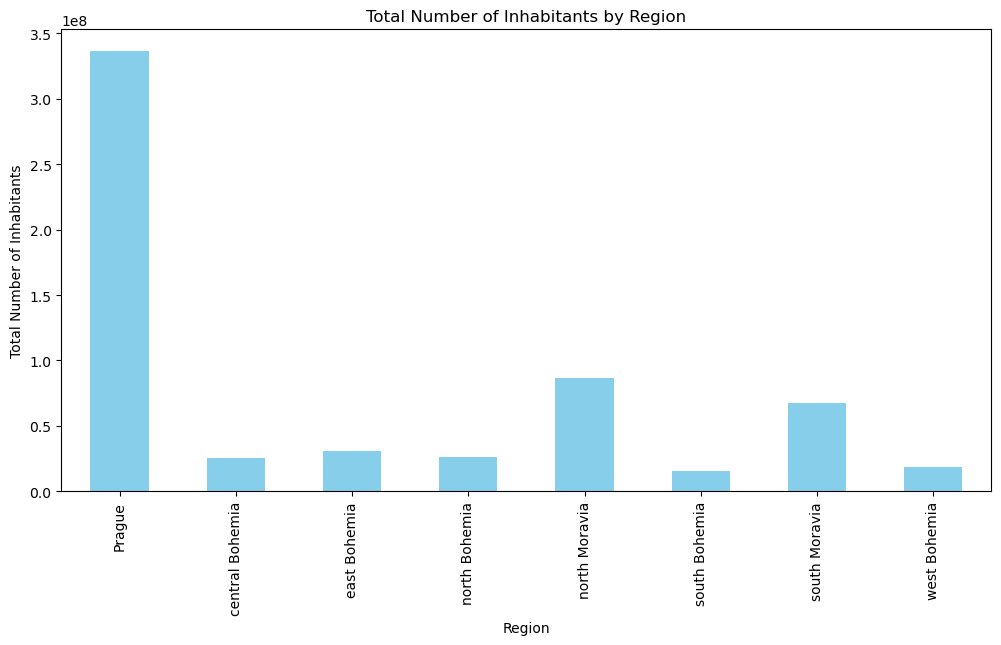

In [106]:
# Group by 'region' and calculate the sum of 'no_of_inhabitants'
grouped_data = df2.groupby('region')['no_of_inhabitants'].sum()

# Plotting a bar chart for the number of inhabitants for each region
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Total Number of Inhabitants by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Inhabitants')
plt.show()

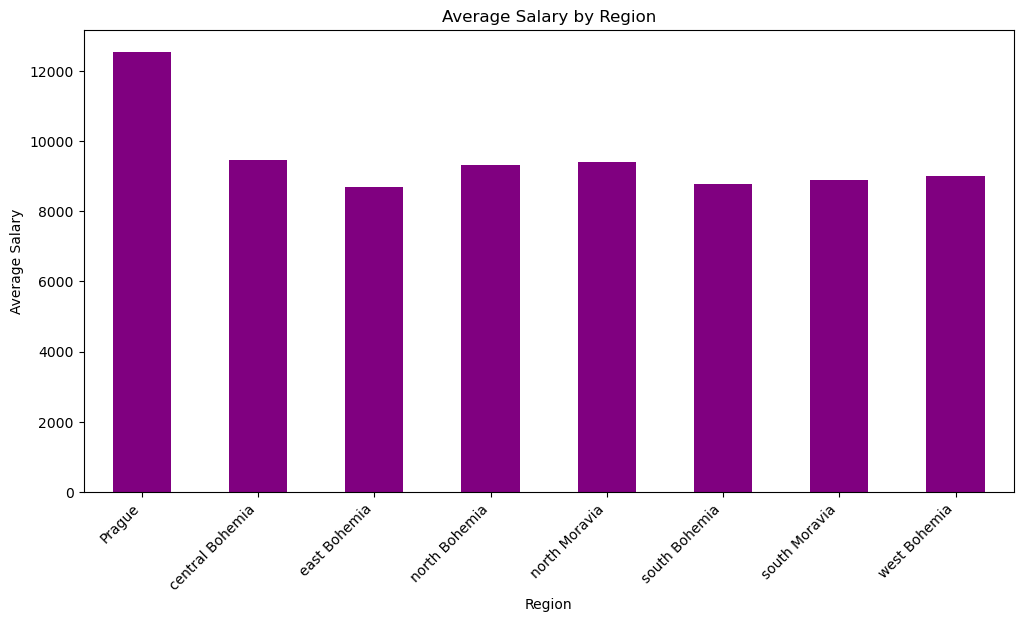

In [107]:
average_salary_by_region = df2.groupby('region')['avg_salary'].mean()

plt.figure(figsize=(12, 6))
average_salary_by_region.plot(kind='bar', color='purple')
plt.title('Average Salary by Region')
plt.xlabel('Region')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

# Prague has notably higher average salary than other regions which indicates clients from Prague might have lower default risk (hypothesis)

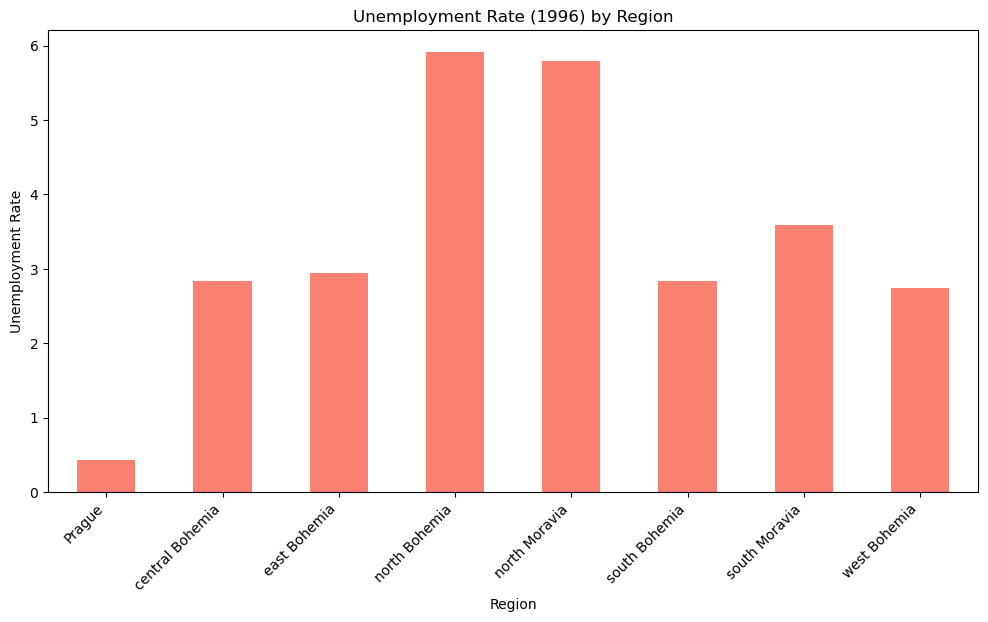

In [108]:
unemployment_rate_by_region = df2.groupby('region')['unemploy_rate96'].mean()

plt.figure(figsize=(12, 6))
unemployment_rate_by_region.plot(kind='bar', color='salmon')
plt.title('Unemployment Rate (1996) by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

# north Bohemia and north Moravia had highest unemployment rate in 1996, while Prague has the lowest, which means that
# clients from Prague might have lower default risk (hypothesis)

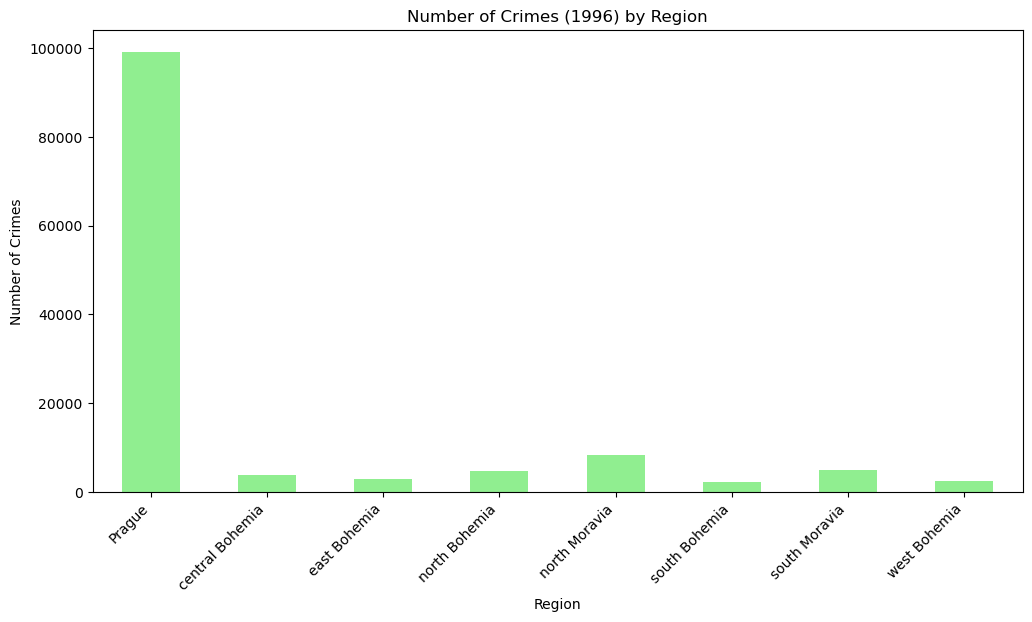

In [109]:
no_crimes_by_region = df2.groupby('region')['no_crimes96'].mean()

plt.figure(figsize=(12, 6))
no_crimes_by_region.plot(kind='bar', color='lightgreen')
plt.title('Number of Crimes (1996) by Region')
plt.xlabel('Region')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Prague region has the highest number of crimes in 1996 that is dramatically higher than other regions with almost 100000 cases

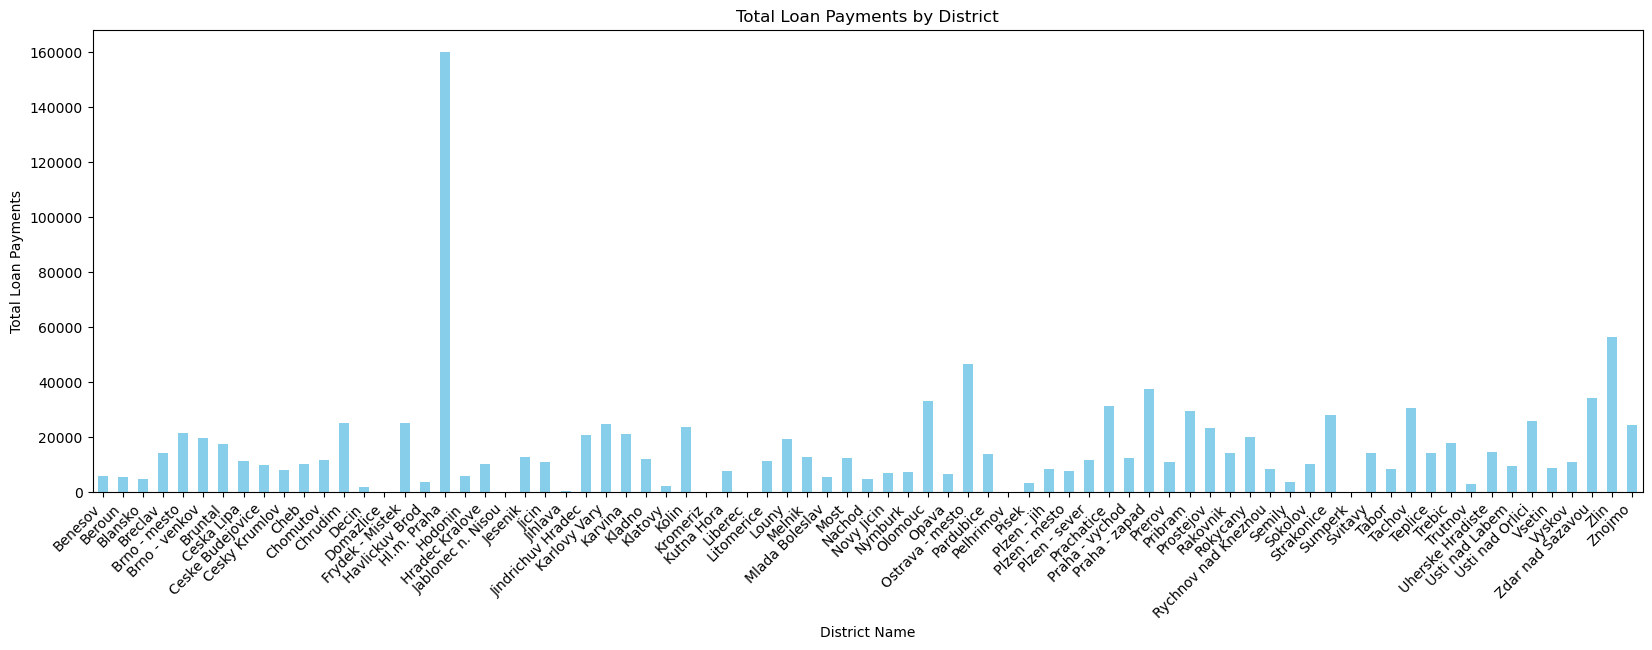

,loan_payments
district_name,
Benesov,5916.0
Beroun,5633.0
Blansko,4588.0
Breclav,14338.0
Brno - mesto,21569.0
...,...
Vsetin,8726.0
Vyskov,11036.0
Zdar nad Sazavou,34204.0


In [110]:
total_loan_payments_by_district = df2.groupby('district_name')['loan_payments'].sum()

plt.figure(figsize=(20, 6))
total_loan_payments_by_district.plot(kind='bar', color='skyblue')
plt.title('Total Loan Payments by District')
plt.xlabel('District Name')
plt.ylabel('Total Loan Payments')
plt.xticks(rotation=45, ha='right')
plt.show()

pd.DataFrame(total_loan_payments_by_district)

# Praha district has the highest amount of loan payments before 1997 that is dramatically higher than other regions with almost 160000 euros

In [111]:
# Calculate region vs. loan default risk
df2.groupby('region')['tv1_loan_granted_97'].agg('mean').sort_values(ascending=False)

region
west Bohemia       0.101382
east Bohemia       0.098113
south Moravia      0.095718
north Bohemia      0.092920
north Moravia      0.092269
south Bohemia      0.086486
Prague             0.068100
central Bohemia    0.063197
Name: tv1_loan_granted_97, dtype: float64

In [112]:
# Calculate region vs. issuance probability of credit card
df2.groupby('region')['tv2_card_issued_97'].agg('mean').sort_values(ascending=False)

region
south Moravia      0.120907
central Bohemia    0.118959
north Moravia      0.117207
north Bohemia      0.110619
east Bohemia       0.109434
Prague             0.096774
west Bohemia       0.087558
south Bohemia      0.081081
Name: tv2_card_issued_97, dtype: float64

### Graphs and statistics about clients' transactions and orders info

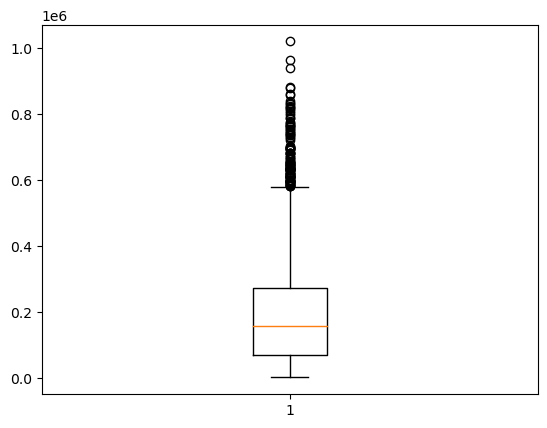

In [113]:
plt.boxplot(df2['tot_amount_withdrawals'])
plt.show()

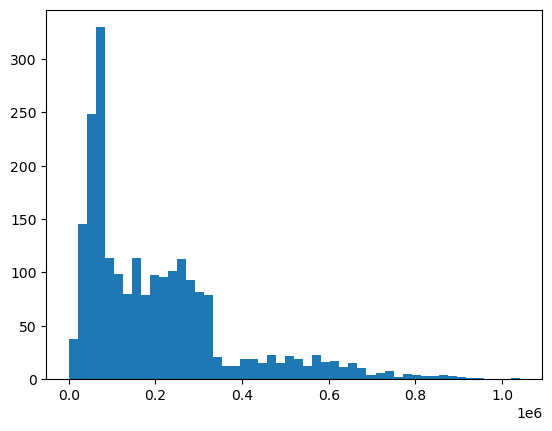

In [114]:
plt.hist(df2['tot_amount_credits'], bins=50)
plt.show()

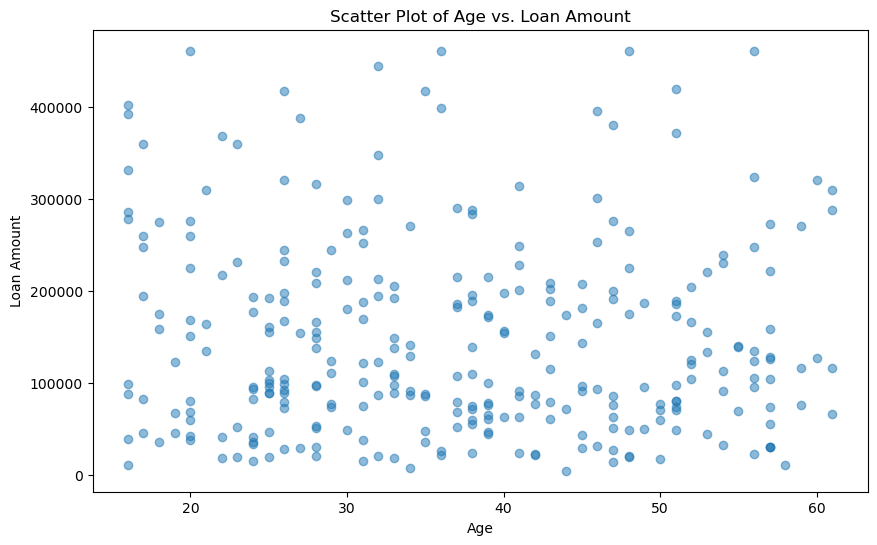

In [115]:
#Loan Amount vs. Age
plt.figure(figsize=(10, 6))
plt.scatter(df2['age'], df2['loan_amount'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Loan Amount')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.grid(False)
plt.show()

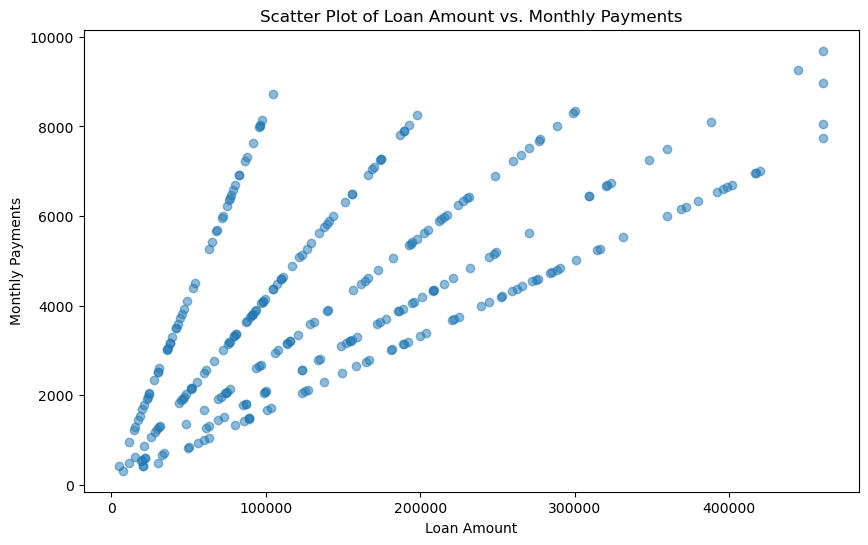

In [116]:
#Loan Amount vs. Loan Duration
plt.figure(figsize=(10, 6))
plt.scatter(df2['loan_amount'], df2['loan_payments'], alpha=0.5)
plt.title('Scatter Plot of Loan Amount vs. Monthly Payments')
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Payments')
plt.grid(False)
plt.show()

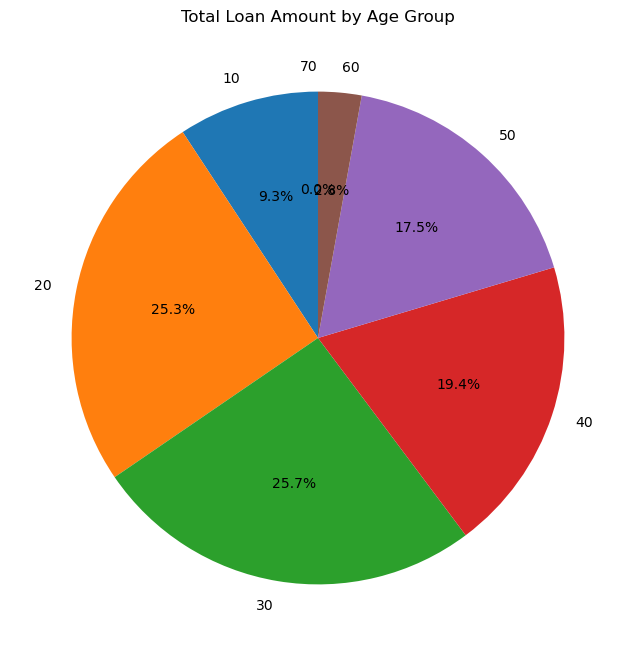

,loan_amount
age_group,
10,4.001124e+06
20,1.094095e+07
30,1.110294e+07
40,8.389019e+06
50,7.579739e+06
60,1.229472e+06
70,0.000000e+00


In [117]:
total_loan_amount_by_age_group = df2.groupby('age_group')['loan_amount'].sum()

plt.figure(figsize=(8, 8))
plt.pie(total_loan_amount_by_age_group, labels=total_loan_amount_by_age_group.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Loan Amount by Age Group')
plt.show()

pd.DataFrame(total_loan_amount_by_age_group)

# The majority of the total loan amount is concentrated in the age groups between 20 and 50 years old.

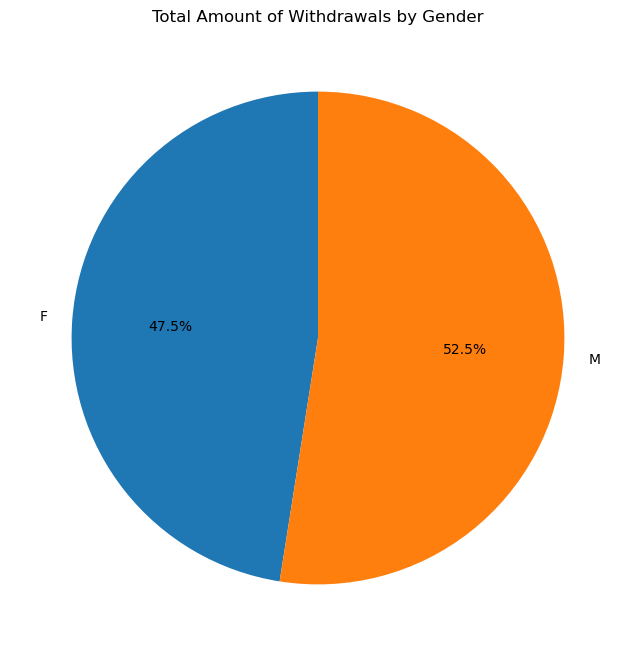

,tot_amount_withdrawals
gender,
F,215146804.3
M,237697185.2


In [118]:
total_withdrawals_by_gender = df2.groupby('gender')['tot_amount_withdrawals'].sum()

plt.figure(figsize=(8, 8))
plt.pie(total_withdrawals_by_gender, labels=total_withdrawals_by_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Amount of Withdrawals by Gender')
plt.show()

pd.DataFrame(total_withdrawals_by_gender)

# males withdrawaled slightly more money than females in 1996.

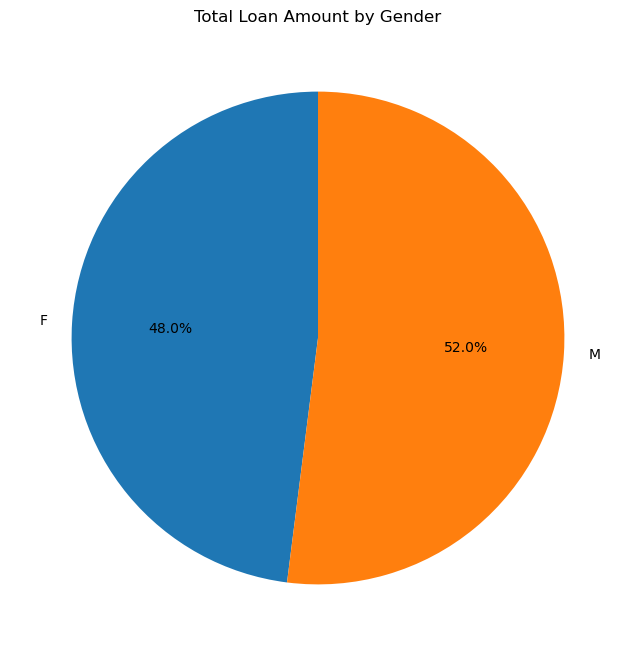

,loan_amount
gender,
F,2.075381e+07
M,2.248944e+07


In [119]:
total_loan_amount_by_gender = df2.groupby('gender')['loan_amount'].sum()

plt.figure(figsize=(8, 8))
plt.pie(total_loan_amount_by_gender, labels=total_loan_amount_by_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Loan Amount by Gender')
plt.show()

pd.DataFrame(total_loan_amount_by_gender)

# males loaned slightly more money than females before 1997.

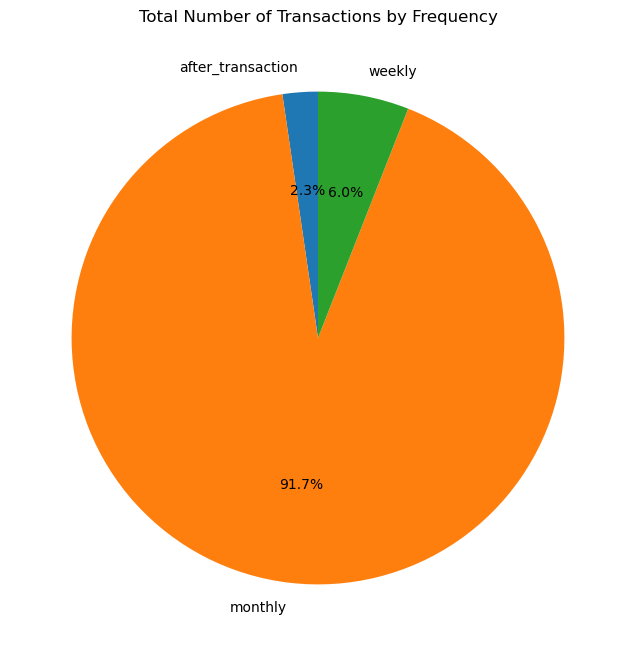

,tot_transactions
frequency,
after_transaction,3786
monthly,150273
weekly,9772


In [120]:
total_transactions_by_frequency = df2.groupby('frequency')['tot_transactions'].sum()

plt.figure(figsize=(8, 8))
plt.pie(total_transactions_by_frequency, labels=total_transactions_by_frequency.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Number of Transactions by Frequency')
plt.show()

pd.DataFrame(total_transactions_by_frequency)

# clients with monthly issuance statements did most of the transactions in 1996

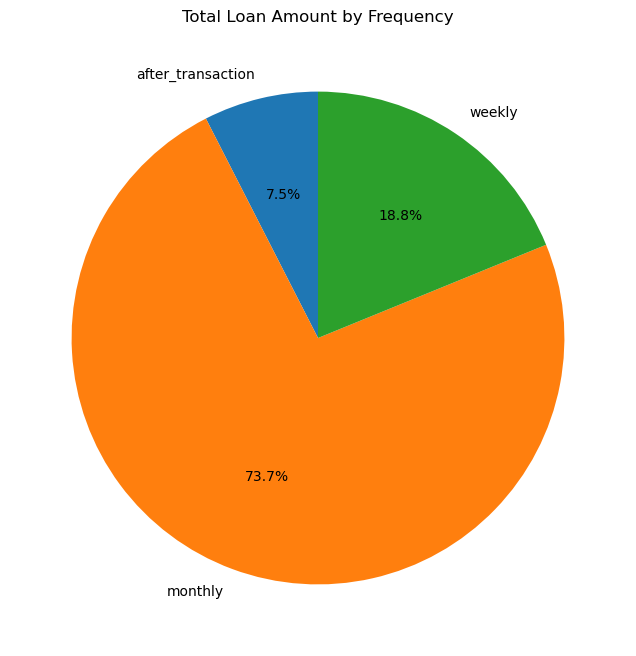

,loan_amount
frequency,
after_transaction,3.250716e+06
monthly,3.185232e+07
weekly,8.140211e+06


In [121]:
total_loan_amount_by_frequency = df2.groupby('frequency')['loan_amount'].sum()

plt.figure(figsize=(8, 8))
plt.pie(total_loan_amount_by_frequency, labels=total_loan_amount_by_frequency.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Loan Amount by Frequency')
plt.show()

pd.DataFrame(total_loan_amount_by_frequency)

pd.DataFrame(total_loan_amount_by_frequency)

# clients with monthly issuance statements loan more money than other two groups with 73.7% of the total loan amount.

In [122]:
print(df2['age'].describe())
print(df2['tot_transactions'].describe())
print(df2['avg_monthly_amount_withdrawal'].describe())

count    2239.000000
mean       42.056722
std        17.102929
min        14.000000
25%        27.000000
50%        41.000000
75%        55.000000
max        78.000000
Name: age, dtype: float64
count    2239.000000
mean       73.171505
std        17.699459
min         5.000000
25%        63.000000
50%        72.000000
75%        83.000000
max       142.000000
Name: tot_transactions, dtype: float64
count     2239.000000
mean     16925.283951
std      14236.075605
min        438.333333
25%       5885.350000
50%      13168.266667
75%      22837.775000
max      85080.850000
Name: avg_monthly_amount_withdrawal, dtype: float64


In [123]:
# Calculate gender vs. loan default risk 
df2.groupby('gender')['tv1_loan_granted_97'].agg('mean').sort_values(ascending=False)

gender
F    0.098708
M    0.077056
Name: tv1_loan_granted_97, dtype: float64

In [124]:
# Calculate gender vs. issuance probability of credit card
df2.groupby('gender')['tv2_card_issued_97'].agg('mean').sort_values(ascending=False)

gender
F    0.130996
M    0.086580
Name: tv2_card_issued_97, dtype: float64

In [125]:
# Calculate frequency vs. loan default risk 
df2.groupby('frequency')['tv1_loan_granted_97'].agg('mean').sort_values(ascending=False)

frequency
weekly               0.114754
monthly              0.087482
after_transaction    0.020833
Name: tv1_loan_granted_97, dtype: float64

In [126]:
# Calculate frequency vs. issuance probability of credit card
df2.groupby('frequency')['tv2_card_issued_97'].agg('mean').sort_values(ascending=False)

frequency
weekly               0.122951
monthly              0.109232
after_transaction    0.020833
Name: tv2_card_issued_97, dtype: float64

### Graphs and statistics about loan and card

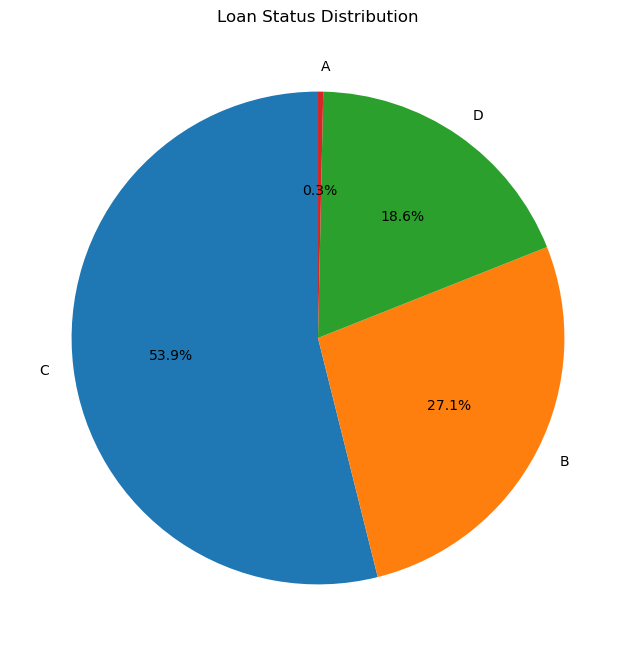

,loan_status
C,159
B,80
D,55
A,1


In [127]:
loan_status_counts = df2['loan_status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')
plt.show()

pd.DataFrame(loan_status_counts)

# most of the clients are in status C which means 'running contract, OK so far' by 31/12/1996 with 53.9%, 159 people.
# only one client which stands for 0.3% of the whole group that reached status A: contract finished, no problems, by 31/12/1996

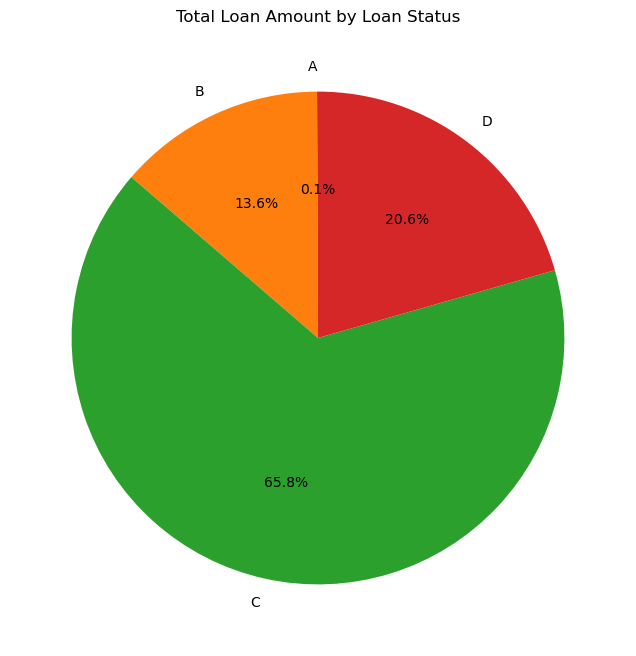

,loan_amount
loan_status,
A,2.798400e+04
B,5.886420e+06
C,2.843593e+07
D,8.892911e+06


In [128]:
total_loan_amount_by_status = df2.groupby('loan_status')['loan_amount'].sum()

plt.figure(figsize=(8, 8))
plt.pie(total_loan_amount_by_status, labels=total_loan_amount_by_status.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Loan Amount by Loan Status')
plt.show()

pd.DataFrame(total_loan_amount_by_status)

# clients in status C tended to loan more money than the other status with 65.8% of the total loan amount.

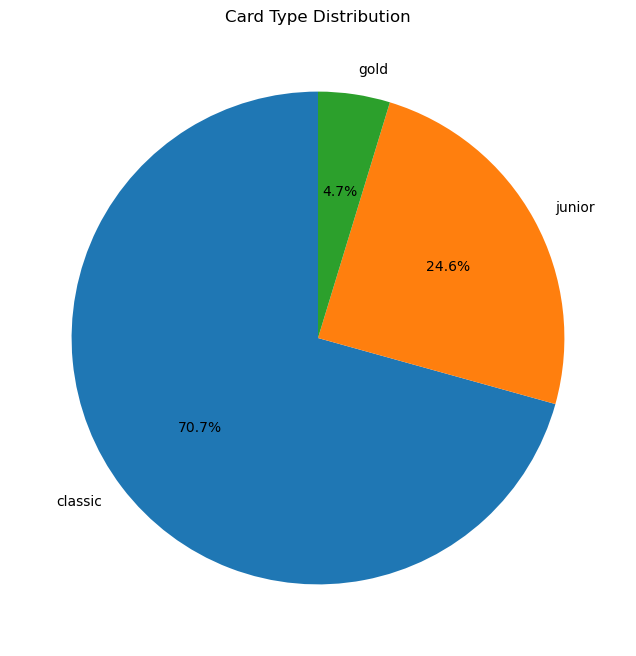

,card_type
classic,135
junior,47
gold,9


In [129]:
card_type_counts = df2['card_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Card Type Distribution')
plt.show()

pd.DataFrame(card_type_counts)

# most of the account owners are issued with classic card with 70.7% of the group before 1997.

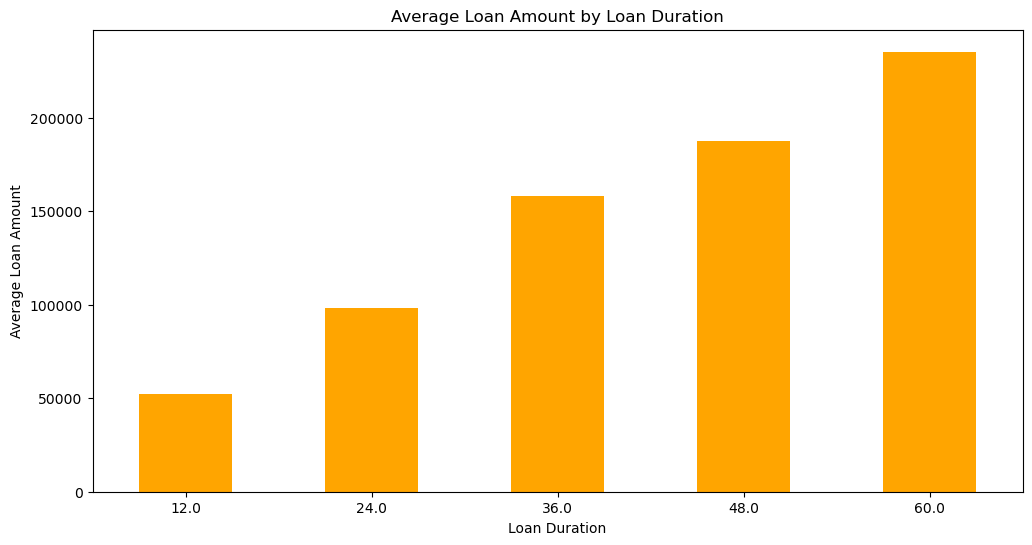

In [130]:
average_loan_amount_by_duration = df2.groupby('loan_duration')['loan_amount'].mean()

plt.figure(figsize=(12, 6))
average_loan_amount_by_duration.plot(kind='bar', color='orange')
plt.title('Average Loan Amount by Loan Duration')
plt.xlabel('Loan Duration')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=0)
plt.show()

# the graph indicates obviously that the longer of its loan duration the higher average amount of the loan 

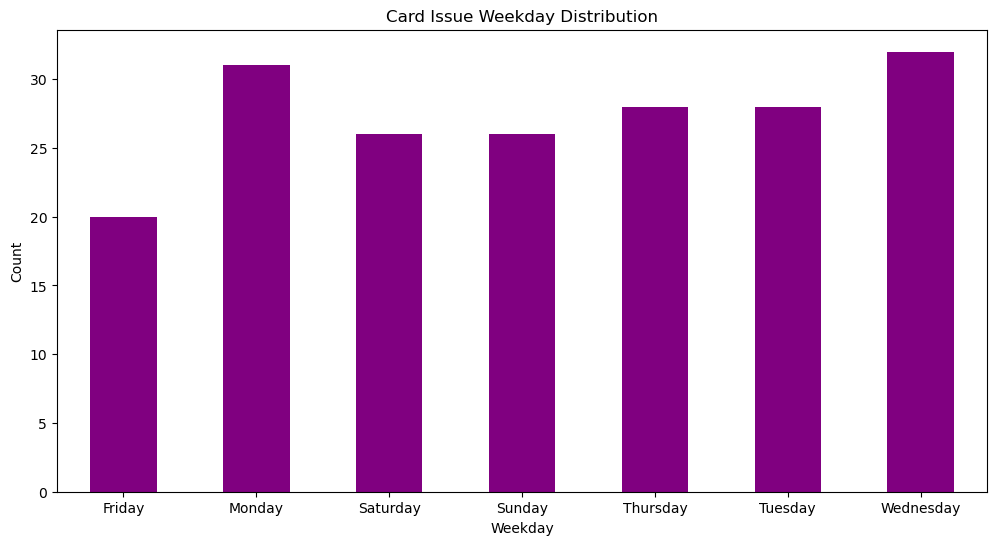

In [131]:
card_issue_weekday_counts = df2['card_issue_weekday'].value_counts()

plt.figure(figsize=(12, 6))
card_issue_weekday_counts.sort_index().plot(kind='bar', color='purple')
plt.title('Card Issue Weekday Distribution')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [132]:
print(df2['loan_amount'].describe())
print(df2['loan_payments'].describe())
print(df2['loan_total_expected_paid_amount'].describe())

count       295.000000
mean     146587.262051
std      105552.172585
min        4980.000000
25%       68616.000000
50%      115992.000000
75%      203394.000000
max      461050.576244
Name: loan_amount, dtype: float64
count     295.000000
mean     4138.064407
std      2168.100378
min       319.000000
25%      2410.500000
50%      3883.000000
75%      5892.500000
max      9689.000000
Name: loan_payments, dtype: float64
count       295.000000
mean      83118.111864
std       69034.276611
min           0.000000
25%       28256.000000
50%       62118.000000
75%      124096.000000
max      337386.000000
Name: loan_total_expected_paid_amount, dtype: float64


In [133]:
# Calculate card_type vs. loan default risk 
df2.groupby('card_type')['tv1_loan_granted_97'].agg('mean').sort_values(ascending=False)

card_type
classic    0.125926
gold       0.111111
junior     0.042553
Name: tv1_loan_granted_97, dtype: float64

In [134]:
# Calculate loan_duration vs. issuance probability of credit card 
df2.groupby('loan_duration')['tv2_card_issued_97'].agg('mean').sort_values(ascending=False)

loan_duration
24.0    0.154930
12.0    0.150943
48.0    0.113208
60.0    0.111111
36.0    0.109091
Name: tv2_card_issued_97, dtype: float64

In [135]:
# Calculate loan_status vs. issuance probability of credit card
df2.groupby('loan_status')['tv2_card_issued_97'].agg('mean').sort_values(ascending=False)

loan_status
B    0.212500
C    0.113208
D    0.054545
A    0.000000
Name: tv2_card_issued_97, dtype: float64

In [136]:
# Remove the observation with null values in all 'credits' variables
to_drop = df2[df2['tot_amount_credits'].isna()]
df2.drop(to_drop.index, inplace=True)

In [137]:
# IV, DV list for target variable 1 granted_loan
iv_list = df2.drop(['tv1_loan_granted_97', 'tv2_card_issued_97'], axis=1)
dv_list1 = df2['tv1_loan_granted_97']
dv_list2 = df2['tv2_card_issued_97']

In [138]:
df2

,client_id,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group,account_id,bank_district_id,frequency,opening_year,lor,opening_date,disp_id,tot_transactions,first_trans_date,last_trans_date,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other,per_op_creditcard_withdrawal,per_op_credit_cash,per_op_collection_otherbank,per_op_withdrawal_cash,per_op_remittance_otherbank,per_op_other,balance_after_first_trans,balance_after_last_trans,activity_duration_days,account_growth,tot_k_insurrance_payment,tot_amount_k_insurrance_payment,tot_k_statement_payment,tot_amount_k_statement_payment,tot_k_interest_credited,tot_amount_k_interest_credited,tot_k_sanction_interest,tot_amount_k_sanction_interest,tot_k_household,tot_amount_k_household,tot_k_oldage_pension,tot_amount_k_oldage_pension,tot_k_loan_payment,tot_amount_k_loan_payment,tot_k_other,tot_amount_k_other,per_k_insurrance_payment,per_k_statement_payment,per_k_interest_credited,per_k_sanction_interest,per_k_household,per_k_oldage_pension,per_k_loan_payment,per_k_other,banks_count,tot_orders,order_tot_insurrance_payment,order_avg_amount_insurrance_payment,order_tot_household_payment,order_avg_amount_household_payment,order_tot_loan_payment,order_avg_amount_loan_payment,order_tot_other,order_avg_amount_other,loan_id,loan_date,loan_amount,loan_duration,loan_payments,loan_expected_end_date,loan_total_expected_paid_amount,loan_num_trans,loan_actual_tot_paid,loan_status,card_id,card_type,card_issued,card_issue_weekday,district_name,region,no_of_inhabitants,no_of_inhabitants<499,no_of_inhabitants_500-1999,no_of_inhabitants_2000-9999,no_of_inhabitants>10000,no_of_cities,ratio_urban_inhabitants,avg_salary,unemploy_rate96,no_enterp_per_1000_inhabitants,no_crimes96,tv1_loan_granted_97,tv2_card_issued_97
0,692,74,1936,11,1,F,60,60,576,55,monthly,1993,3,1993-01-01,692,62,1996-01-03,1996-12-31,61.290323,5.166667,2.000000,3.166667,146516.5,12209.708333,76097.3,6341.441667,70419.2,5868.266667,6207.0,109.5,7550.0,14.6,NaN,NaN,NaN,NaN,12.0,74484.0,26.0,26475.2,12.0,43944.0,12.0,1613.3,NaN,NaN,19.354839,41.935484,19.354839,19.354839,30583.4,38501.6,363,25.890516,NaN,NaN,12.0,175.2,12.0,1613.3,NaN,NaN,12.0,43944.0,12.0,74484.0,NaN,NaN,14,26300.0,NaN,19.354839,19.354839,NaN,19.354839,19.354839,NaN,22.580645,2,1.0,NaN,NaN,1.0,3662.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,2.43,111,3894,0,0
1,4601,1,1935,2,4,M,61,60,3818,74,monthly,1993,3,1993-01-01,4601,98,1996-01-04,1996-12-31,74.489796,8.166667,2.083333,6.083333,458341.6,38195.133333,234806.4,19567.200000,223535.2,18627.933333,26049.0,120.7,20480.0,14.6,NaN,NaN,13.0,232658.0,NaN,NaN,37.0,113915.2,36.0,109620.0,12.0,2148.4,NaN,13.265306,NaN,37.755102,36.734694,12.244898,35712.7,49023.8,362,37.272735,12.0,48780.0,12.0,175.2,12.0,2148.4,NaN,NaN,12.0,43152.0,NaN,NaN,NaN,NaN,50,364086.0,12.244898,12.244898,12.244898,NaN,12.244898,NaN,NaN,51.020408,3,3.0,1.0,4065.0,1.0,3596.0,NaN,NaN,1.0,1474.0,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,5.44,100,18347,0,0
2,844,22,1945,14,1,M,51,50,704,55,monthly,1993,3,1993-01-01,844,84,1996-01-02,1996-12-31,71.428571,7.000000,2.000000,5.000000,447046.1,37253.841667,228514.9,19042.908333,218531.2,18210.933333,26216.0,92.6,18500.0,14.6,NaN,NaN,12.0,227202.0,NaN,NaN,36.0,178475.2,24.0,40056.0,12.

## **Part 5:** Data Preprocessing

In [139]:
# Categorical variables
iv_cat_list = [v for v in iv_list if df2[v].dtypes == object]
print(len(iv_cat_list), iv_cat_list)

7 ['gender', 'frequency', 'loan_status', 'card_type', 'card_issue_weekday', 'district_name', 'region']


In [140]:
# Date variables
iv_date_list = [v for v in iv_list if df2[v].dtype in ['datetime64[ns]']]
print(len(iv_date_list), iv_date_list)

6 ['opening_date', 'first_trans_date', 'last_trans_date', 'loan_date', 'loan_expected_end_date', 'card_issued']


In [141]:
# Ids
# Select columns that end with 'id'
iv_id_list = [col for col in df2.columns if col.endswith('id')]

# Drop 'loan_actual_tot_paid' from the list
iv_id_list = [col for col in iv_id_list if col != 'loan_actual_tot_paid']
print(len(iv_id_list), iv_id_list)

7 ['client_id', 'client_district_id', 'account_id', 'bank_district_id', 'disp_id', 'loan_id', 'card_id']


In [142]:
# Numerical variables
iv_num_list = [v for v in iv_list if v not in iv_cat_list and v not in iv_date_list and v not in iv_id_list]
print(len(iv_num_list), iv_num_list)

95 ['birth_year', 'birth_day', 'birth_month', 'age', 'age_group', 'opening_year', 'lor', 'tot_transactions', 'withdrawals_percentage', 'avg_monthly_trans', 'avg_monthly_credits', 'avg_monthly_withdrawals', 'tot_amount', 'avg_monthly_amount', 'tot_amount_credits', 'avg_monthly_amount_credits', 'tot_amount_withdrawals', 'avg_monthly_amount_withdrawal', 'max_amount_credits', 'min_amount_credits', 'max_amount_withdrawals', 'min_amount_withdrawals', 'tot_op_creditcard_withdrawal', 'tot_amount_op_creditcard_withdrawal', 'tot_op_credit_cash', 'tot_amount_op_credit_cash', 'tot_op_collection_otherbank', 'tot_amount_op_collection_otherbank', 'tot_op_withdrawal_cash', 'tot_amount_op_withdrawal_cash', 'tot_op_remittance_otherbank', 'tot_amount_op_remittance_otherbank', 'tot_op_other', 'tot_amount_op_other', 'per_op_creditcard_withdrawal', 'per_op_credit_cash', 'per_op_collection_otherbank', 'per_op_withdrawal_cash', 'per_op_remittance_otherbank', 'per_op_other', 'balance_after_first_trans', 'balan

In [143]:
len(iv_cat_list + iv_date_list + iv_num_list + iv_id_list)

115

In [144]:
# Check if the sum of the IV is equal to total number of columns +2 = 115+2 = 117
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2238 entries, 0 to 2238
Columns: 117 entries, client_id to tv2_card_issued_97
dtypes: datetime64[ns](6), float64(77), int32(9), int64(18), object(7)
memory usage: 1.9+ MB


#### Correlations Matrix

In [145]:
# check correlations between dependent variables and numerical independent varibales
# it is not applicable for the categorical IVs to do correlations before making them dummies

dependent_variables = ['tv1_loan_granted_97', 'tv2_card_issued_97']
selected_columns = iv_num_list + dependent_variables
selected_df = df2[selected_columns]

# Calculating correlation matrix
correlation_matrix = selected_df.corr()

# Displaying the top+ and last- 10 correlations of numerical independent variables with the dependent variables 

print(correlation_matrix[['tv1_loan_granted_97']].sort_values(by='tv1_loan_granted_97', ascending=False).head(10))

print(correlation_matrix[['tv1_loan_granted_97']].sort_values(by='tv1_loan_granted_97', ascending=True).head(10))

print(correlation_matrix[['tv2_card_issued_97']].sort_values(by='tv2_card_issued_97', ascending=False).head(10))

print(correlation_matrix[['tv2_card_issued_97']].sort_values(by='tv2_card_issued_97', ascending=True).head(10))

# it can be seen that most of the correlations are quite weak before handling the outliers and missing values

                                     tv1_loan_granted_97
tv1_loan_granted_97                             1.000000
tv2_card_issued_97                              0.477471
loan_num_trans                                  0.285878
lor                                             0.279680
loan_total_expected_paid_amount                 0.221520
loan_actual_tot_paid                            0.217095
per_k_loan_payment                              0.209776
tot_k_loan_payment                              0.170256
tot_amount_op_creditcard_withdrawal             0.133468
tot_op_creditcard_withdrawal                    0.114561
                                tv1_loan_granted_97
opening_year                              -0.279680
tot_k_sanction_interest                   -0.099270
per_k_sanction_interest                   -0.096227
tot_amount_k_sanction_interest            -0.086998
order_tot_other                           -0.039555
order_tot_household_payment               -0.038299
loan_dura

In [146]:
# Calculating correlation matrix
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

correlation_matrix = selected_df.corr()
correlation_matrix

,birth_year,birth_day,birth_month,age,age_group,opening_year,lor,tot_transactions,withdrawals_percentage,avg_monthly_trans,avg_monthly_credits,avg_monthly_withdrawals,tot_amount,avg_monthly_amount,tot_amount_credits,avg_monthly_amount_credits,tot_amount_withdrawals,avg_monthly_amount_withdrawal,max_amount_credits,min_amount_credits,max_amount_withdrawals,min_amount_withdrawals,tot_op_creditcard_withdrawal,tot_amount_op_creditcard_withdrawal,tot_op_credit_cash,tot_amount_op_credit_cash,tot_op_collection_otherbank,tot_amount_op_collection_otherbank,tot_op_withdrawal_cash,tot_amount_op_withdrawal_cash,tot_op_remittance_otherbank,tot_amount_op_remittance_otherbank,tot_op_other,tot_amount_op_other,per_op_creditcard_withdrawal,per_op_credit_cash,per_op_collection_otherbank,per_op_withdrawal_cash,per_op_remittance_otherbank,per_op_other,balance_after_first_trans,balance_after_last_trans,activity_duration_days,account_growth,tot_k_insurrance_payment,tot_amount_k_insurrance_payment,tot_k_statement_payment,tot_amount_k_statement_payment,tot_k_interest_credited,tot_amount_k_interest_credited,tot_k_sanction_interest,tot_amount_k_sanction_interest,tot_k_household,tot_amount_k_household,tot_k_oldage_pension,tot_amount_k_oldage_pension,tot_k_loan_payment,tot_amount_k_loan_payment,tot_k_other,tot_amount_k_other,per_k_insurrance_payment,per_k_statement_payment,per_k_interest_credited,per_k_sanction_interest,per_k_household,per_k_oldage_pension,per_k_loan_payment,per_k_other,banks_count,tot_orders,order_tot_insurrance_payment,order_avg_amount_insurrance_payment,order_tot_household_payment,order_avg_amount_household_payment,order_tot_loan_payment,order_avg_amount_loan_payment,order_tot_other,order_avg_amount_other,loan_amount,loan_duration,loan_payments,loan_total_expected_paid_amount,loan_num_trans,loan_actual_tot_paid,no_of_inhabitants,no_of_inhabitants<499,no_of_inhabitants_500-1999,no_of_inhabitants_2000-9999,no_of_inhabitants>10000,no_of_cities,ratio_urban_inhabitants,avg_salary,unemploy_rate96,no_enterp_per_1000_inhabitants,no_crimes96,tv1_loan_granted_97,tv2_card_issued_97
birth_year,1.000000,-0.031310,-0.014780,-1.000000,-0.986877,0.046416,-0.046416,0.126800,-0.076505,0.127714,0.195007,0.080671,0.196784,0.196934,0.194840,0.195855,0.198215,0.199036,0.328892,0.114408,0.221650,0.043193,-0.011223,-0.055450,0.100751,-0.081503,NaN,0.365194,0.144173,0.190894,0.193639,0.286645,0.049506,0.206007,0.063712,0.140693,-0.302196,0.062097,0.112896,-0.037907,0.169029,0.164971,-0.025130,0.006222,0.035292,0.011451,-0.015458,0.040393,0.049506,0.206007,0.048108,-0.044302,-0.046247,0.214901,NaN,0.015180,-0.115094,-0.047602,0.427834,0.244119,-0.035914,-0.176218,-0.037907,-0.005521,-0.390612,0.003247,-0.059284,0.561206,-0.188278,0.217005,NaN,0.004619,-0.283952,0.205119,NaN,0.029173,0.005593,-0.037834,0.052122,0.006739,0.040361,-0.040965,-0.105841,-0.054122,0.007132,0.010157,-0.046184,-0.046625,-0.050997,-0.042434,0.015201,0.019568,-0.008404,0.013234,0.009329,-0.006089,0.009989
birth_day,-0.031310,1.000000,-0.007865,0.031310,0.027144,0.012403,-0.012403,-0.036211,-0.036364,-0.036361,-0.007724,-0.037324,-0.018890,-0.018916,-0.019435,-0.019173,-0.018286,-0.017812,-0.013227,-0.029586,-0.001407,0.014563,-0.071290,-0.112845,0.010617,0.001082,NaN,-0.029459,-0.025453,-0.010374,-0.017902,-0.025902,-0.013003,-0.023466,-0.092802,0.026572,0.030401,0.001343,-0.004681,0.032968,-0.000361,-0.014905,-0.000145,-0.021107,-0.012861,0.009465,-0.025128,0.002522,-0.013003,-0.023466,0.199153,0.270574,-0.033287,-0.050489,NaN,-0.161215,0.086581,0.130338,-0.042320,-0.016652,-0.030469,0.032599,0.032968,0.259199,0.024199,0.063568,0.099819,-0.035514,-0.003999,-0.017856,NaN,0.011399,0.014532,-0.047540,NaN,0.087287,-0.018265,0.046852,0.058910,-0.020321,0.106506,0.050686,-0.026146,0.035062,-0.027126,-0.012866,0.022155,0.016472,0.021526,0.029930,-0.019044,-0.024751,0.008805,0.000432,-0.027564,0.024332,0.015426
birth_month,-0.014780,-0.007865,1.000000,0.014780,0.016770,0.013131,-0.013131,0.015678

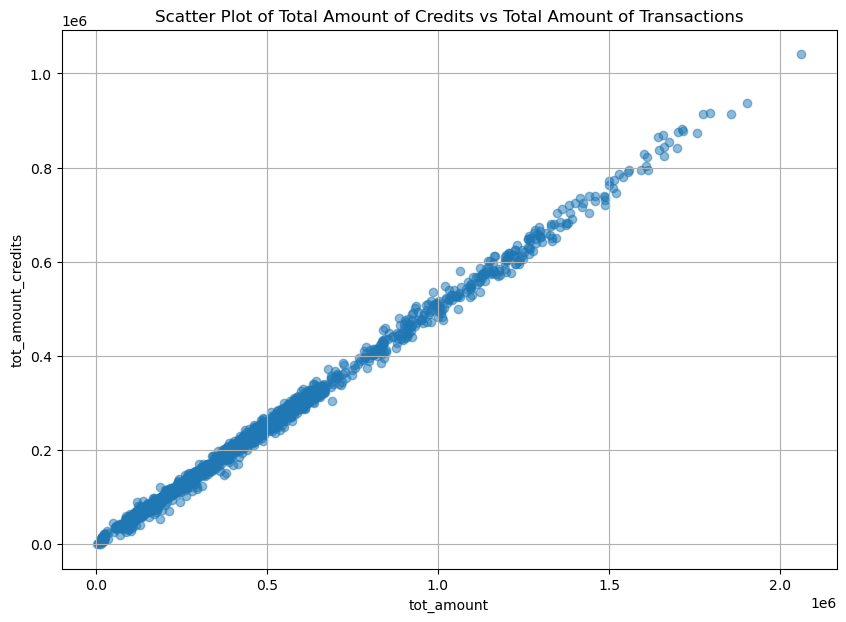

In [147]:
# since there is a high correlation between tot_amount and tot_amount_credits, plot a scatter plot to check
x_column = 'tot_amount'
y_column = 'tot_amount_credits'

# Create a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(df2[x_column], df2[y_column], alpha=0.5)
plt.title(f'Scatter Plot of Total Amount of Credits vs Total Amount of Transactions')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

# this means that there is a posiive linear relationship between Total Amount of Credits and Total Amount of Transactions.

### 5.1. Error correction

#### 5.1.1. Missing value

##### (a) Missing value in numerical variables

In [148]:
# # Install Python library

# pip install -U feature-engine

In [149]:
# Check missing value
df2[iv_num_list].isna().sum().sum()

64433

In [150]:
# Print out numeric columns with missing value

for v in iv_num_list:
    if df2[v].isna().sum() > 0:
        
        # Calculate the count of missing values
        cnt_missing = df2[v].isna().sum()
        
        # Calculate the percentage of missing values
        percentage_missing = (cnt_missing / len(df2)) * 100
        print(v, '[', df2[v].dtype, ']', cnt_missing, 'count(s), % of missing: {:.2f}'.format(percentage_missing))
        
if df2[iv_num_list].isna().sum().sum() == 0: 
    print("No missing value in numeric variables ")

tot_op_creditcard_withdrawal [ float64 ] 2067 count(s), % of missing: 92.36
tot_amount_op_creditcard_withdrawal [ float64 ] 2067 count(s), % of missing: 92.36
tot_op_credit_cash [ float64 ] 622 count(s), % of missing: 27.79
tot_amount_op_credit_cash [ float64 ] 622 count(s), % of missing: 27.79
tot_op_collection_otherbank [ float64 ] 1443 count(s), % of missing: 64.48
tot_amount_op_collection_otherbank [ float64 ] 1443 count(s), % of missing: 64.48
tot_op_remittance_otherbank [ float64 ] 484 count(s), % of missing: 21.63
tot_amount_op_remittance_otherbank [ float64 ] 484 count(s), % of missing: 21.63
tot_op_other [ float64 ] 17 count(s), % of missing: 0.76
tot_amount_op_other [ float64 ] 17 count(s), % of missing: 0.76
per_op_creditcard_withdrawal [ float64 ] 2067 count(s), % of missing: 92.36
per_op_credit_cash [ float64 ] 622 count(s), % of missing: 27.79
per_op_collection_otherbank [ float64 ] 1443 count(s), % of missing: 64.48
per_op_remittance_otherbank [ float64 ] 484 count(s), %

In [151]:
# Replace numerical missing values by 0, and create a missing indicator for each variable imputed

from feature_engine.imputation import AddMissingIndicator
from feature_engine.imputation import ArbitraryNumberImputer

# Initialize the transformer to add missing indicators
indicator = AddMissingIndicator(variables=iv_num_list)

# Fit and transform the transformer on the DataFrame
df2_with_missing_indicator = indicator.fit_transform(df2)

# Initialize the imputer for mean/median imputation
ami = ArbitraryNumberImputer(arbitrary_number=0, variables=iv_num_list)

# Fit and transform the imputer on the DataFrame
df2 = ami.fit_transform(df2_with_missing_indicator)

In [152]:
# Check if the code worked
# Print out numeric columns with missing value
for v in iv_num_list:
    if df2[v].isna().sum() > 0:
        
        # Calculate the count of missing values
        cnt_missing = df2[v].isna().sum()
        
        # Calculate the percentage of missing values
        percentage_missing = (cnt_missing / len(df2)) * 100
        print(v, '[', df2[v].dtype, ']', cnt_missing, 'count(s), % of missing: {:.2f}'.format(percentage_missing))
        
if df2[iv_num_list].isna().sum().sum() == 0: 
    print("No missing value in numeric variables ")

No missing value in numeric variables 


##### (b) Missing value in categorical variables

In [153]:
# Check missing value for categorical variables
df2[iv_cat_list].isna().sum().sum()

6037

In [154]:
# Print out date columns with missing value
for v in iv_cat_list:
    if df2[v].isna().sum() > 0:
        
        # Calculate the count of missing values
        cnt_missing = df2[v].isna().sum()
        
        # Calculate the percentage of missing values
        percentage_missing = (cnt_missing / len(df2)) * 100
        print(v, '[', df2[v].dtype, ']', cnt_missing, 'count(s), % of missing: {:.2f}'.format(percentage_missing))
        
if df2[iv_cat_list].isna().sum().sum() == 0: 
    print("No missing value in date variables ")

loan_status [ object ] 1943 count(s), % of missing: 86.82
card_type [ object ] 2047 count(s), % of missing: 91.47
card_issue_weekday [ object ] 2047 count(s), % of missing: 91.47


In [155]:
# Imput NAs in cat vars
df2[iv_cat_list] = df2[iv_cat_list].fillna("NAN")

In [156]:
# Check if the code worked
for v in iv_cat_list:
    if df2[v].isna().sum() > 0:
        print(v, '[', df2[v].dtype, ']', df2[v].isna().sum(), 'missing(s)')
        
if df2[iv_cat_list].isna().sum().sum() == 0: 
    print("No missing value in categorical variables ")

No missing value in categorical variables 


##### (c) Missing value in date variables

In [157]:
# Print out date columns with missing value
for v in iv_date_list:
    if df2[v].isna().sum() > 0:
        
        # Calculate the count of missing values
        cnt_missing = df2[v].isna().sum()
        
        # Calculate the percentage of missing values
        percentage_missing = (cnt_missing / len(df2)) * 100
        print(v, '[', df2[v].dtype, ']', cnt_missing, 'count(s), % of missing: {:.2f}'.format(percentage_missing))
        
if df2[iv_date_list].isna().sum().sum() == 0: 
    print("No missing value in date variables ")

loan_date [ datetime64[ns] ] 1943 count(s), % of missing: 86.82
loan_expected_end_date [ datetime64[ns] ] 1943 count(s), % of missing: 86.82
card_issued [ datetime64[ns] ] 2047 count(s), % of missing: 91.47


#### 5.1.2. Outlier

Note:
- Only replace the outliers if it improves the model performance. Otherwise, it is not recommended.
- Outlier should be rare. If the number of outliers are large, it is not recommended to impute.

In [158]:
# print the outliers for numerical variables
tot_count = 0
tot_col = 0
for v in iv_num_list:
    
    # Calculate the lower and upper boundaries based on mean +/- 3*sd
    lower = df2[v].mean() - 3 * df2[v].std()
    upper = df2[v].mean() + 3 * df2[v].std()
    
    # Count the number of outliers
    cnt_outlier = sum((df2[v] < lower) | (df2[v] > upper))
    
    # Calculate the percentage of outliers values
    percentage_outliers = (cnt_outlier / len(df2)) * 100
    
    # Print out
    if cnt_outlier > 0:
        print(v, '[', df2[v].dtype, ']', cnt_outlier, 'outlier(s), % of outliers in column: {:.2f}'.format(percentage_outliers))
        tot_col += 1
        
    tot_count += cnt_outlier

print("Df has ", tot_count, " outliers, spread in ", tot_col, "columns")

tot_transactions [ int64 ] 29 outlier(s), % of outliers in column: 1.30
withdrawals_percentage [ float64 ] 34 outlier(s), % of outliers in column: 1.52
avg_monthly_trans [ float64 ] 27 outlier(s), % of outliers in column: 1.21
avg_monthly_credits [ float64 ] 46 outlier(s), % of outliers in column: 2.06
avg_monthly_withdrawals [ float64 ] 12 outlier(s), % of outliers in column: 0.54
tot_amount [ float64 ] 38 outlier(s), % of outliers in column: 1.70
avg_monthly_amount [ float64 ] 38 outlier(s), % of outliers in column: 1.70
tot_amount_credits [ float64 ] 38 outlier(s), % of outliers in column: 1.70
avg_monthly_amount_credits [ float64 ] 39 outlier(s), % of outliers in column: 1.74
tot_amount_withdrawals [ float64 ] 37 outlier(s), % of outliers in column: 1.65
avg_monthly_amount_withdrawal [ float64 ] 37 outlier(s), % of outliers in column: 1.65
max_amount_credits [ float64 ] 4 outlier(s), % of outliers in column: 0.18
min_amount_credits [ float64 ] 15 outlier(s), % of outliers in column

In [159]:
# replacing the outliers by upper and lower boundaries. Create a copy of the df

from feature_engine.outliers import Winsorizer

to_winsorize = [v for v in iv_num_list if df2[v].nunique() >= 3]

# Initialize the Winsorizer
wz = Winsorizer(capping_method='gaussian', tail='both', fold=3, add_indicators=False, variables=to_winsorize)

# Fit and transform the Winsorizer on the DataFrame
df2_winsorized = wz.fit_transform(df2)

In [160]:
# Check if the code worked

# print the outliers for numerical variables
tot_count = 0
tot_col = 0
for v in iv_num_list:
    
    # Calculate the lower and upper boundaries based on mean +/- 3*sd
    lower = df2[v].mean() - 3 * df2[v].std()
    upper = df2[v].mean() + 3 * df2[v].std()
    
    # Count the number of outliers
    cnt_outlier = sum((df2_winsorized[v] < lower) | (df2_winsorized[v] > upper))
    
    # Print out
    if cnt_outlier > 0:
        print(v, '[', df2_winsorized[v].dtype, ']', cnt_outlier, 'outlier(s)')
        tot_col += 1
        
    tot_count += cnt_outlier

print("Df_winsorized has ", tot_count, " outliers, spread in ", tot_col, "columns")

Df_winsorized has  0  outliers, spread in  0 columns


### 5.3. Value transformation

- Categorical variables: remapping
- Continuous variables: discretization

#### 5.3.1. Categorical variables: remapping

- Simple approach: Manually remapping (based on frequency or experience)
- Advanced approach: WoE, Decision tree–based

In [161]:
# Check the class frequency distribution of the categorical variables
for v in iv_cat_list:
    print(df2[v].value_counts(normalize=True)*100)

M    51.608579
F    48.391421
Name: gender, dtype: float64
monthly              92.403932
weekly                5.451296
after_transaction     2.144772
Name: frequency, dtype: float64
NAN    86.818588
C       7.104558
B       3.574620
D       2.457551
A       0.044683
Name: loan_status, dtype: float64
NAN        91.465594
classic     6.032172
junior      2.100089
gold        0.402145
Name: card_type, dtype: float64
NAN          91.465594
Wednesday     1.429848
Monday        1.385165
Tuesday       1.251117
Thursday      1.251117
Saturday      1.161752
Sunday        1.161752
Friday        0.893655
Name: card_issue_weekday, dtype: float64
Hl.m. Praha            12.466488
Karvina                 3.395889
Ostrava - mesto         3.127793
Zlin                    2.457551
Brno - mesto            2.412869
Olomouc                 2.144772
Frydek - Mistek         1.653262
Sumperk                 1.429848
Hradec Kralove          1.385165
Opava                   1.385165
Breclav                 1.

## **Part 6:** Applying the Model

In [162]:
# Model A: with no outliers replacement

# Assign to X, y for Target Variable 1

X = df2[iv_num_list]
y = dv_list1.squeeze()  # Ensure y is a 1D array or Series

In [163]:
# Quick test with Decision Tree and 5-fold CV 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # accuracy, roc_auc
print('Model A: Accuracy (5-fold CV) =', scores.mean(), 'for TV1')


Model A: Accuracy (5-fold CV) = 0.8244866570789389 for TV1


In [164]:
dv_list1_wz = df2_winsorized['tv1_loan_granted_97']
dv_list2_wz = df2_winsorized['tv2_card_issued_97']

In [165]:
# Model B: winsorized

# Assign to X, y for Target Variable 1

X = df2_winsorized[iv_num_list]
y = dv_list1_wz.squeeze()  # Ensure y is a 1D array or Series

In [166]:
# Quick test with Decision Tree and 5-fold CV 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # accuracy, roc_auc
print('Model B: Accuracy (5-fold CV) =', scores.mean(), 'for TV1')


Model B: Accuracy (5-fold CV) = 0.8244916506871205 for TV1


In [167]:
# Model A: with no outliers replacement

# Assign to X, y for Target Variable 2

X = df2[iv_num_list]
y = dv_list2.squeeze()  # Ensure y is a 1D array or Series

In [168]:
# Quick test with Decision Tree and 5-fold CV 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # accuracy, roc_auc
print('Model A: Accuracy (5-fold CV) =', scores.mean(), 'for TV2')


Model A: Accuracy (5-fold CV) = 0.8119836609140301 for TV2


In [169]:
# Model B: winsorized

# Assign to X, y for Target Variable 2

X = df2_winsorized[iv_num_list]
y = dv_list2_wz.squeeze()  # Ensure y is a 1D array or Series

In [170]:
# Quick test with Decision Tree and 5-fold CV 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # accuracy, roc_auc
print('Model B: Accuracy (5-fold CV) =', scores.mean(), 'for TV2')


Model B: Accuracy (5-fold CV) = 0.8039429530201343 for TV2


In [171]:
# Since there is no significant improvement of our model performance when replacing the outliers, we will keep df2 as our basetable

In [172]:
basetable = df2
basetable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2238 entries, 0 to 2238
Columns: 168 entries, client_id to loan_actual_tot_paid_na
dtypes: datetime64[ns](6), float64(77), int32(60), int64(18), object(7)
memory usage: 2.4+ MB
